In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import math
import subprocess
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
import time as time
import random 
from scipy import sparse
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [3]:
train.shape

(49352, 15)

In [4]:
train.head(5)

bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   
9      East 56th Street  [Doorman, Elevator, Laundry in Building, Laund...   
10  Metropolitan Avenue                                                 []   
15     East 34th Street  [Doorman, Elevator, Fitness Center, Laundry in...   

    latitude  listing_id  longitude                        manager_id  \
4    40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4   
6    40.7513     7092344   -73.9722  955db33477af4f40004820b4aed804a0   
9    40.7575     7158677   -73.9625  c8b10a317b766204f08e613cef4ce7a0   
10   40.7145     7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
15   40.7439     7225292   -73.9743  2c3b41f588fbb5234d8a1e885a436cfa   

                                               photos  price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...   2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...   3800   
9   [https://photos.renthop.com/2/7158677_c897a134...   3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
15  [https://photos.renthop.com/2/7225292_901f1984...   2795   

             street_address interest_level  
4       145 Borinquen Place         medium  
6             230 East 44th            low  
9      405 East 56th Street         medium  
10  792 Metropolitan Avenue         medium  
15     340 East 34th Street            low

In [5]:
train.describe()

bathrooms      bedrooms      latitude    listing_id     longitude  \
count  49352.00000  49352.000000  49352.000000  4.935200e+04  49352.000000   
mean       1.21218      1.541640     40.741545  7.024055e+06    -73.955716   
std        0.50142      1.115018      0.638535  1.262746e+05      1.177912   
min        0.00000      0.000000      0.000000  6.811957e+06   -118.271000   
25%        1.00000      1.000000     40.728300  6.915888e+06    -73.991700   
50%        1.00000      1.000000     40.751800  7.021070e+06    -73.977900   
75%        1.00000      2.000000     40.774300  7.128733e+06    -73.954800   
max       10.00000      8.000000     44.883500  7.753784e+06      0.000000   

              price  
count  4.935200e+04  
mean   3.830174e+03  
std    2.206687e+04  
min    4.300000e+01  
25%    2.500000e+03  
50%    3.150000e+03  
75%    4.100000e+03  
max    4.490000e+06

In [6]:
train.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [7]:
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [8]:
#list of all numeric data
numeric_data_types = [np.float64, np.float32, np.int64, np.int32]
numeric_columns = train.select_dtypes(include=numeric_data_types)
attribute_names = numeric_columns.columns.tolist()
attribute_names

['bathrooms', 'bedrooms', 'latitude', 'listing_id', 'longitude', 'price']

Display the distinct values for this attributes 'manager_id', 'building_id', 'display_address', 'street_address'

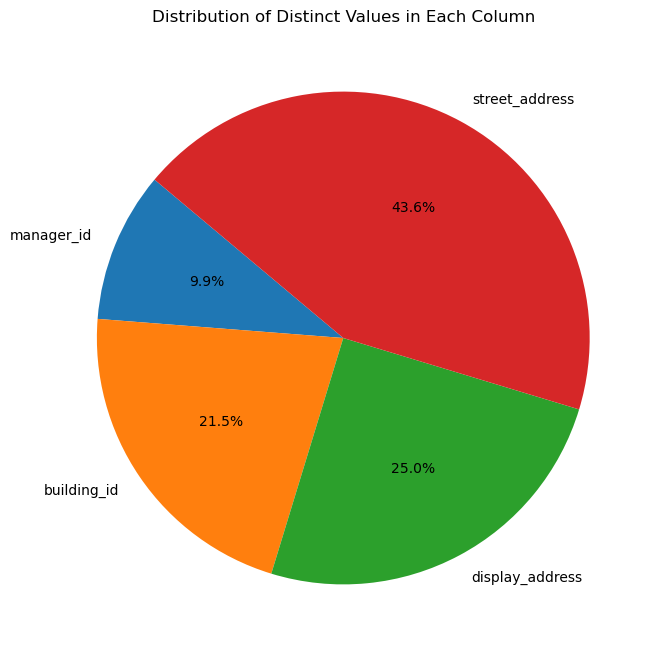

In [9]:
counts = pd.DataFrame({'name': ['manager_id', 'building_id', 'display_address', 'street_address']})
counts['distinct'] = counts['name'].apply(lambda name: len(set(list(train[name]))))
counts
plt.figure(figsize=(8, 8))
plt.pie(counts['distinct'], labels=counts['name'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Distinct Values in Each Column')
plt.show()

# visualization

### visualization for bedroom

In [10]:
print(train['bedrooms'].value_counts())

bedrooms
1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: count, dtype: int64


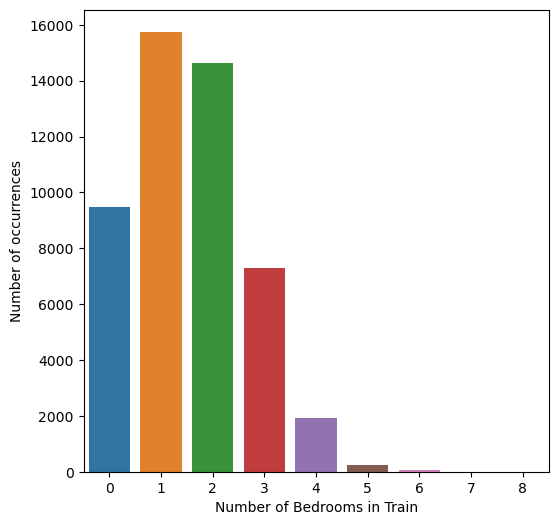

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(x='bedrooms', data=train)
plt.xlabel('Number of Bedrooms in Train')
plt.ylabel('Number of occurrences')
plt.show()

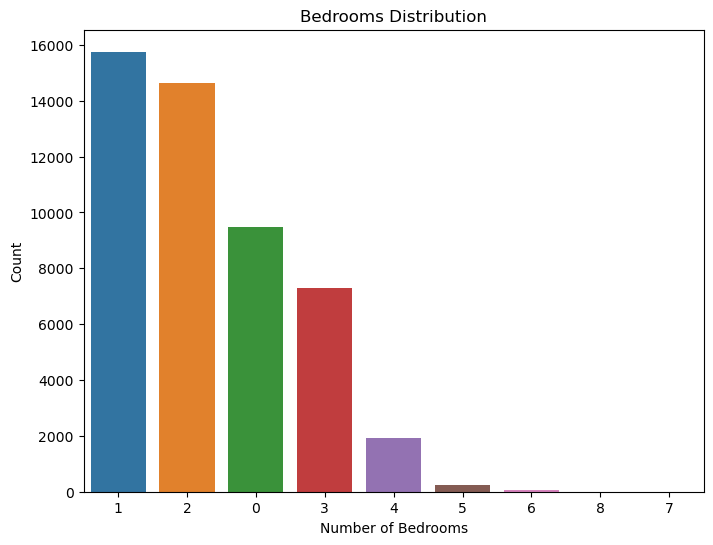

In [12]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='bedrooms', order=train['bedrooms'].value_counts().index)
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

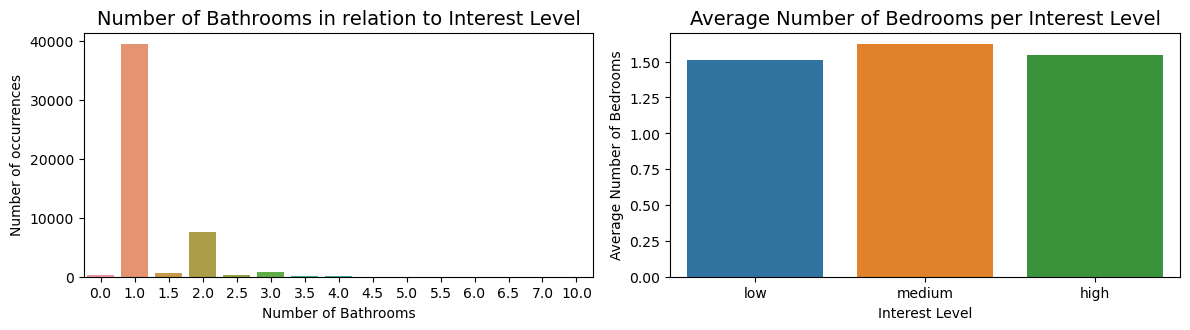

In [13]:
plt.figure(figsize=(12, 6))
# Number of Bathrooms
plt.subplot(221)
plt.title('Number of Bathrooms in relation to Interest Level', fontsize=14)
sns.countplot(data=train, x='bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of occurrences')
# Average Number of Bedrooms per Interest Level
plt.subplot(222)
plt.title('Average Number of Bedrooms per Interest Level', fontsize=14)
sns.barplot(data=train, x='interest_level', y='bedrooms', order=['low', 'medium', 'high'], ci=None)
plt.xlabel('Interest Level')
plt.ylabel('Average Number of Bedrooms')
plt.tight_layout()
plt.show()

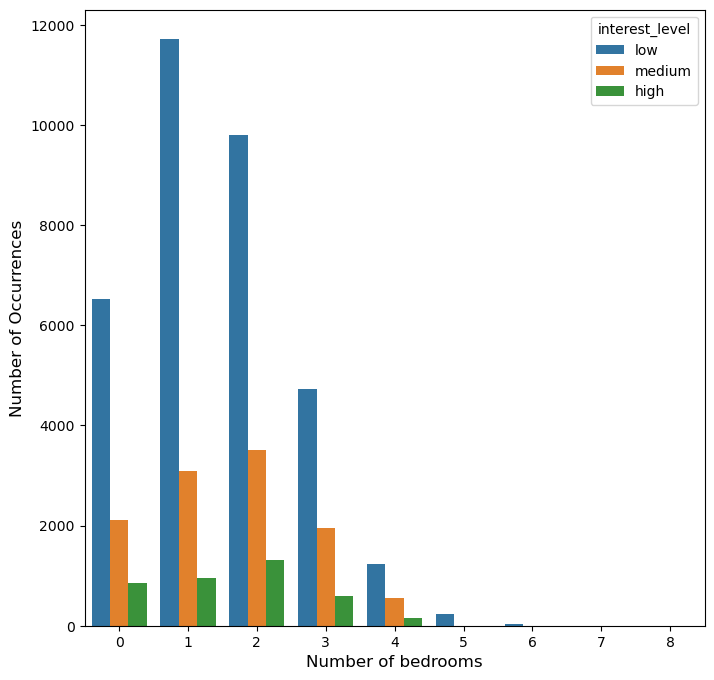

In [14]:
plt.figure(figsize=(8, 8))
sns.countplot(x='bedrooms', hue='interest_level', hue_order=['low', 'medium', 'high'], data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.show()

### visualization for bathroom

In [15]:
print(train['bathrooms'].value_counts())

bathrooms
1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
7.0         1
10.0        1
Name: count, dtype: int64


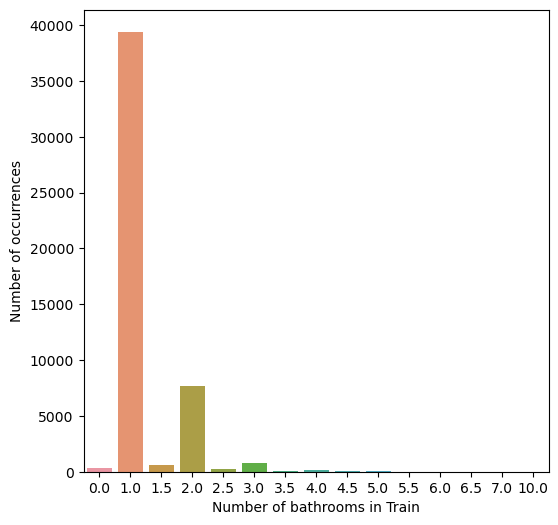

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(x='bathrooms', data=train)
plt.xlabel('Number of bathrooms in Train')
plt.ylabel('Number of occurrences')
plt.show()

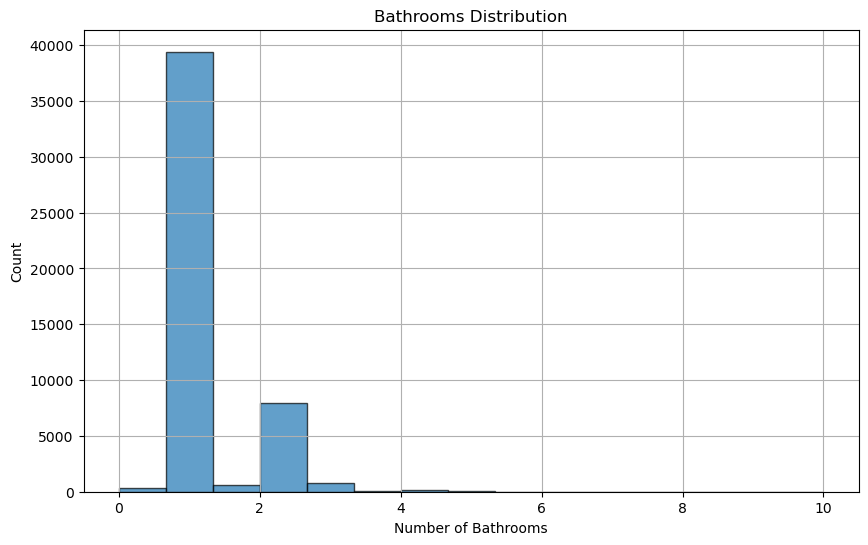

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(train['bathrooms'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Bathrooms Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()

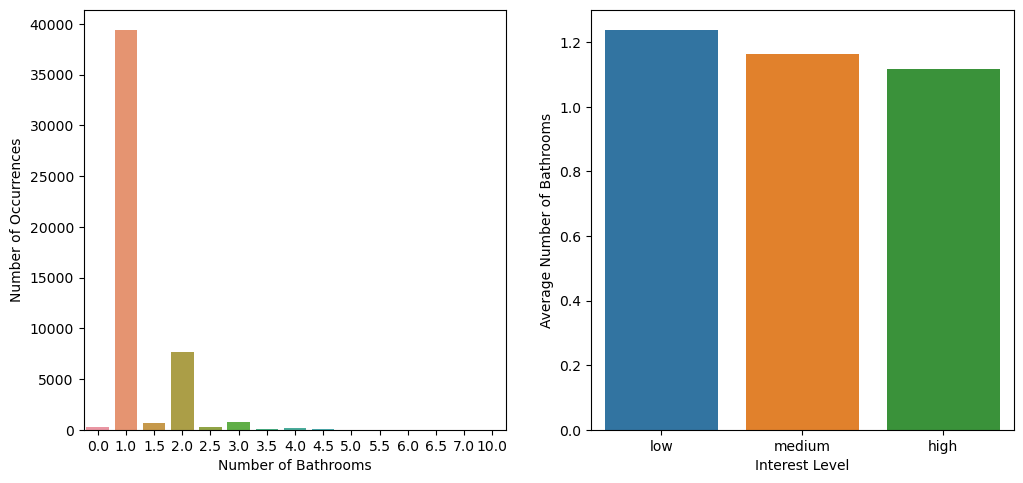

In [18]:
fig = plt.figure(figsize=(12, 12))

# Count plot for 'bathrooms'
plt.subplot(221)
sns.countplot(x='bathrooms', data=train)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Occurrences')

# Bar plot for 'interest_level' vs. 'bathrooms'
plt.subplot(222)
sns.barplot(x='interest_level', y='bathrooms', data=train, order=['low', 'medium', 'high'], ci=None)
plt.xlabel('Interest Level')
plt.ylabel('Average Number of Bathrooms')

plt.show()

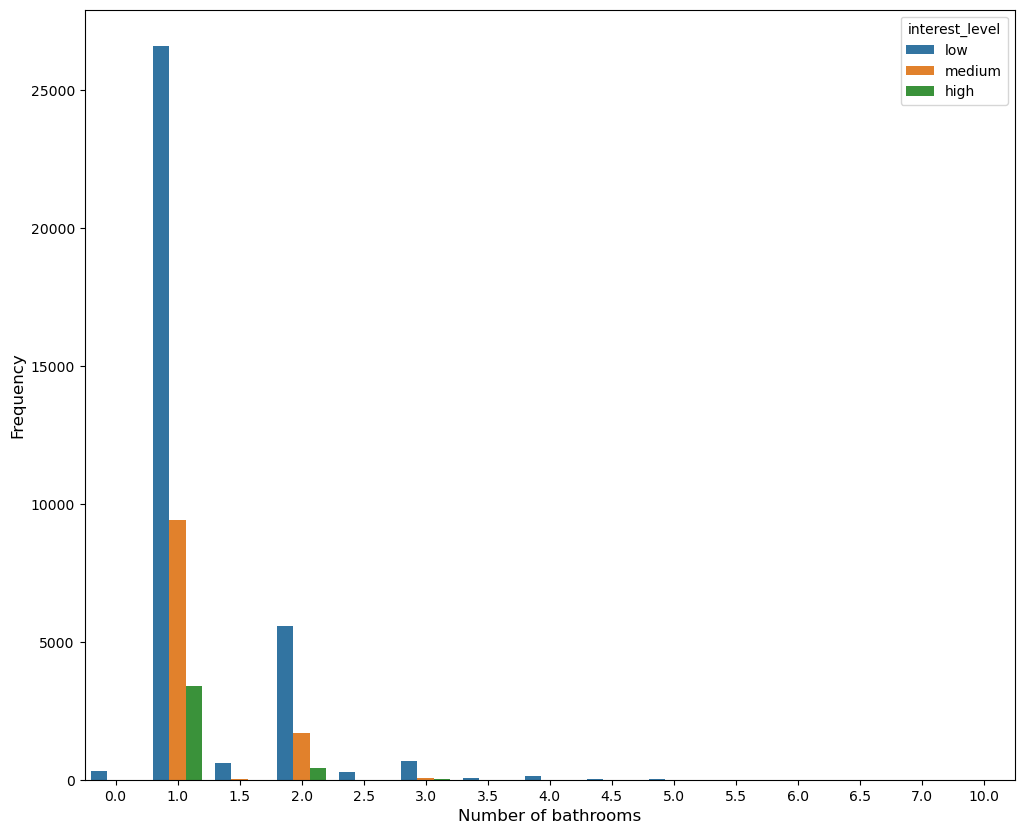

In [19]:
plt.figure(figsize=(12, 10))
sns.countplot(x='bathrooms', hue='interest_level', hue_order=['low', 'medium', 'high'], data=train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.show()

### Removing the outliers 

In [20]:
DatabeforeremovingOutliers = train.shape
DatabeforeremovingOutliers

(49352, 15)

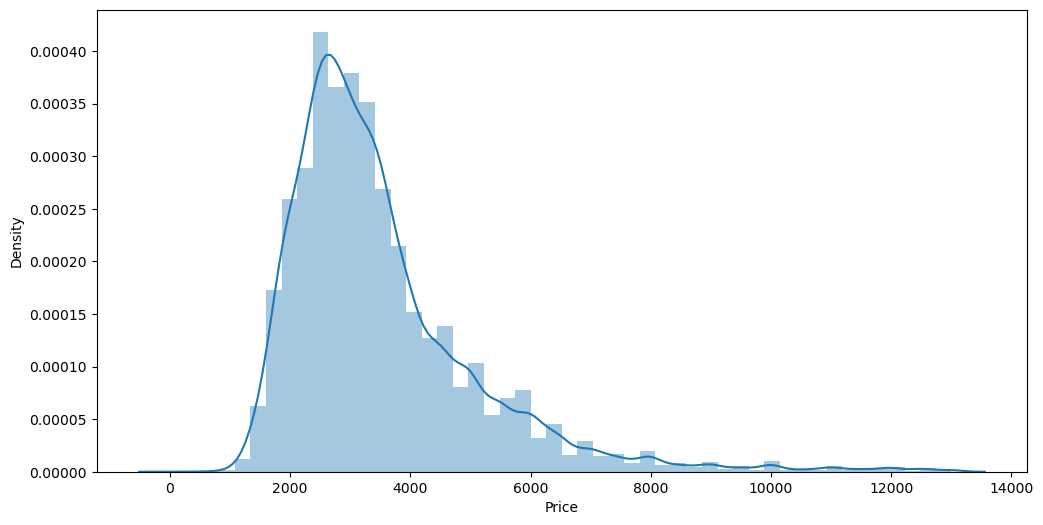

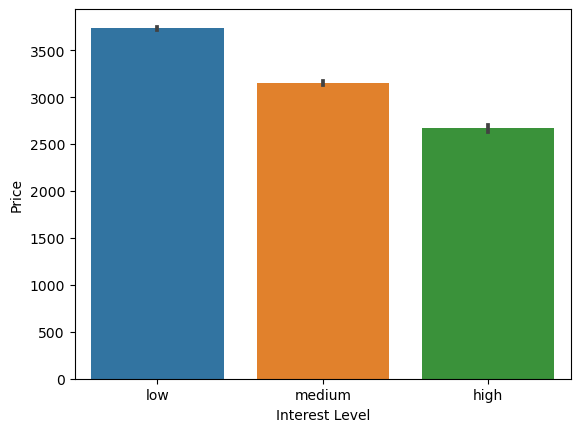

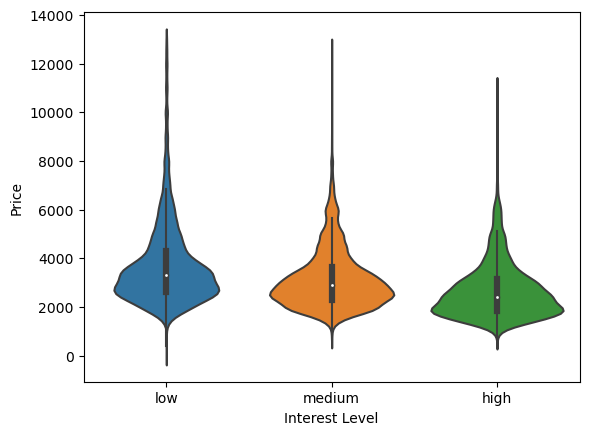

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers based on quantile
quantile_value = 0.99  
train = train[train['price'] <= train['price'].quantile(quantile_value)]
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(train['price'], ax=ax)
ax.set_xlabel('Price')
ax.set_ylabel('Density')
plt.show()

# Barplot for average price by interest level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'], data=train, )
plt.xlabel('Interest Level')
plt.ylabel('Price')
plt.show()

# Violin plots for price by interest level
sns.violinplot(x="interest_level", y="price", order=['low', 'medium', 'high'], data=train, )
plt.xlabel('Interest Level')
plt.ylabel('Price')
plt.show()


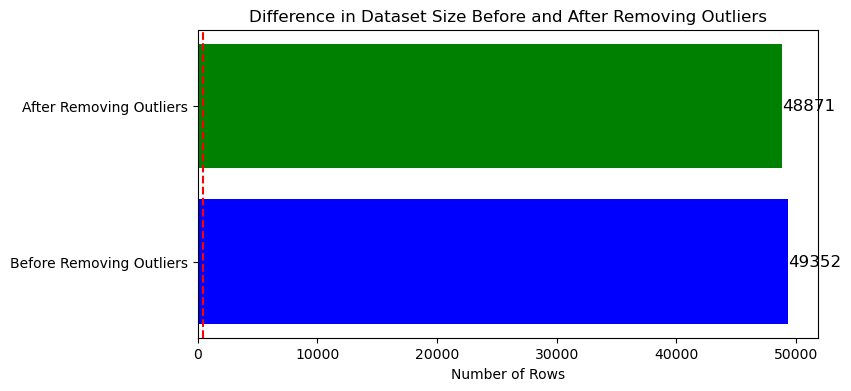

In [22]:
data_before_removing_outliers = DatabeforeremovingOutliers[0]

data_after_removing_outliers = train.shape[0]

difference = data_before_removing_outliers - data_after_removing_outliers

# Create a horizontal bar plot with annotations
plt.figure(figsize=(8, 4))
plt.barh(['Before Removing Outliers', 'After Removing Outliers'], [data_before_removing_outliers, data_after_removing_outliers], color=['blue', 'green'])
plt.xlabel('Number of Rows')
plt.title('Difference in Dataset Size Before and After Removing Outliers')

# Add annotations to display the difference
for i, v in enumerate([data_before_removing_outliers, data_after_removing_outliers]):
    plt.text(v, i, str(v), color='black', va='center', fontsize=12)

# Add a line to connect the annotations
plt.axvline(x=difference, color='red', linestyle='--')

plt.show()

#### visualization the interest level 

In [23]:
Interest_value_counts = train['interest_level'].value_counts()

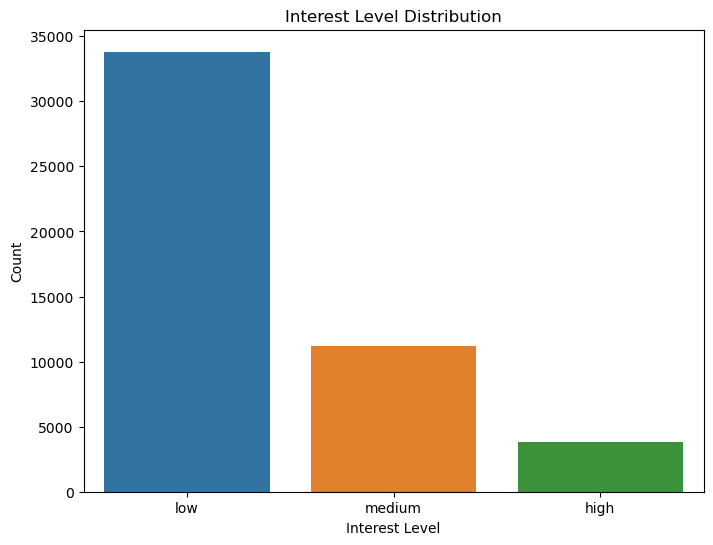

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='interest_level', order=['low', 'medium', 'high'])
plt.title('Interest Level Distribution')
plt.xlabel('Interest Level')
plt.ylabel('Count')
plt.show()

In [25]:
percent_low = 100 * train['interest_level'].value_counts()['low'] / train['interest_level'].value_counts().sum()
percent_medium = 100 * train['interest_level'].value_counts()['medium'] / train['interest_level'].value_counts().sum()
percent_high = 100 * train['interest_level'].value_counts()['high'] / train['interest_level'].value_counts().sum()
print('low-->', percent_low, '%')
print('medium-->', percent_medium, '%')
print('high-->', percent_high, '%')

low--> 69.18417875631765 %
medium--> 22.964539297333797 %
high--> 7.85128194634855 %


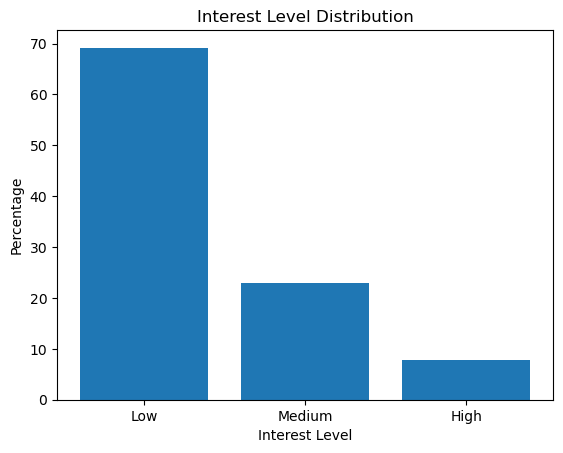

In [26]:
interest_levels = ['Low', 'Medium', 'High']
percentages = [percent_low, percent_medium, percent_high]
plt.bar(interest_levels, percentages)
plt.xlabel('Interest Level')
plt.ylabel('Percentage')
plt.title('Interest Level Distribution')
plt.show()


#### Display the average price based on the interest level

Text(0, 0.5, 'Price')

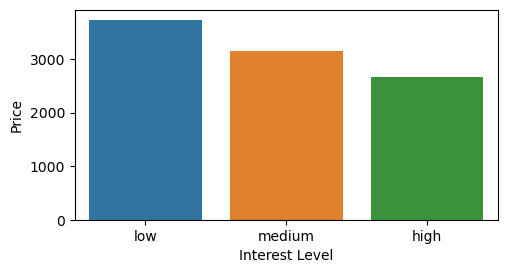

In [27]:
plt.figure(figsize=(12, 6))

# Barplot for average price by interest level
plt.subplot(223)
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train, ci=None)
plt.xlabel('Interest Level')
plt.ylabel('Price')


#### Based on number of Bathroom comparing with interest level 

In [28]:
baths=pd.crosstab(train.bathrooms, train.interest_level, margins=True)
baths['low interest (%)']=100*baths['low']/baths['All']
baths['medium interest (%)']=100*baths['medium']/baths['All']
baths['high interest (%)']=100*baths['high']/baths['All']
baths
#baths.drop(['high','low','medium','All'],axis=1)

interest_level  high    low  medium    All  low interest (%)  \
bathrooms                                                      
0.0                1    299       6    306         97.712418   
1.0             3412  26564    9428  39404         67.414476   
1.5                0    605      40    645         93.798450   
2.0              407   5496    1685   7588         72.430153   
2.5                0    230       3    233         98.712446   
3.0               14    505      56    575         87.826087   
3.5                0     33       0     33        100.000000   
4.0                3     76       5     84         90.476190   
4.5                0      1       0      1        100.000000   
5.0                0      1       0      1        100.000000   
10.0               0      1       0      1        100.000000   
All             3837  33811   11223  48871         69.184179   

interest_level  medium interest (%)  high interest (%)  
bathrooms                                               
0.0                        1.960784           0.326797  
1.0                       23.926505           8.659019  
1.5                        6.201550           0.000000  
2.0                       22.206115           5.363732  
2.5                        1.287554           0.000000  
3.0                        9.739130           2.434783  
3.5                        0.000000           0.000000  
4.0                        5.952381           3.571429  
4.5                        0.000000           0.000000  
5.0                        0.000000           0.000000  
10.0                       0.000000           0.000000  
All                       22.964539           7.851282

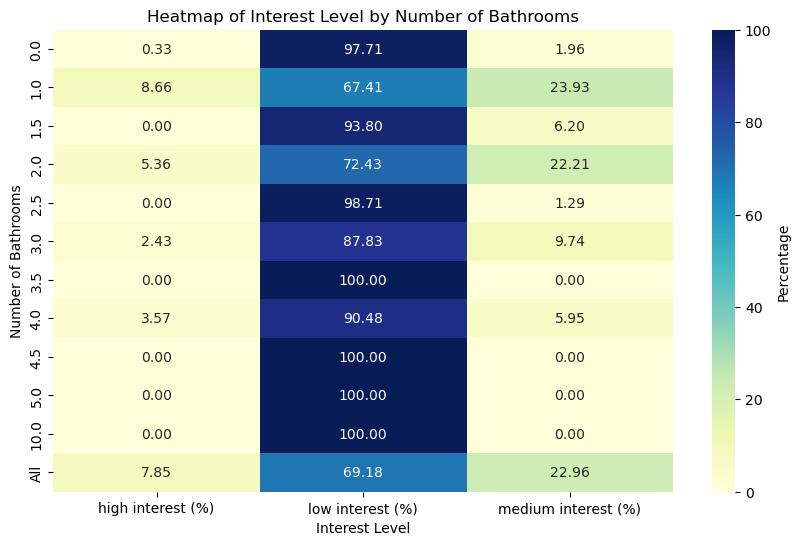

In [29]:
data = baths.pivot_table(values=['low interest (%)', 'medium interest (%)', 'high interest (%)'], index='bathrooms')
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})

plt.xlabel('Interest Level')
plt.ylabel('Number of Bathrooms')
plt.title('Heatmap of Interest Level by Number of Bathrooms')

plt.show()

#### 1 bathroom comparison with the interest level

<Axes: xlabel='bedrooms'>

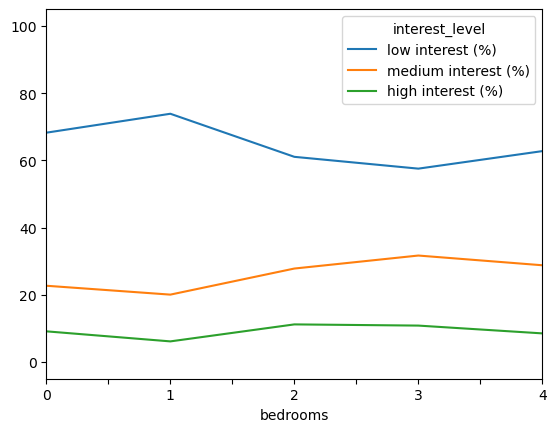

In [30]:
df_entire_1bath=train[train['bathrooms']==1]
beds1bth=pd.crosstab(df_entire_1bath.bedrooms, train.interest_level, margins=True)
beds1bth['low interest (%)']=100*beds1bth['low']/beds1bth['All']
beds1bth['medium interest (%)']=100*beds1bth['medium']/beds1bth['All']
beds1bth['high interest (%)']=100*beds1bth['high']/beds1bth['All']
#print(beds1bth)
beds1bth
beds1bth.plot(y=['low interest (%)','medium interest (%)','high interest (%)'],kind='line',xlim=(0,4))


#### 2 bathroom comparison with the interest level

<Axes: xlabel='bedrooms'>

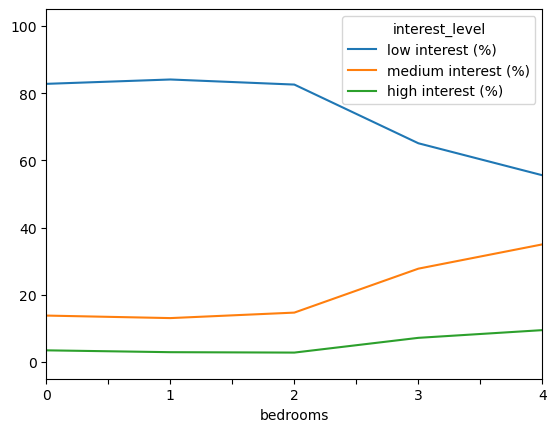

In [31]:
df_entire_2bath=train[train['bathrooms']==2]
beds2bth=pd.crosstab(df_entire_2bath.bedrooms, train.interest_level, margins=True)
beds2bth['low interest (%)']=100*beds2bth['low']/beds2bth['All']
beds2bth['medium interest (%)']=100*beds2bth['medium']/beds2bth['All']
beds2bth['high interest (%)']=100*beds2bth['high']/beds2bth['All']
beds2bth
#print(beds2bth)
beds2bth.plot(y=['low interest (%)','medium interest (%)','high interest (%)'],kind='line',xlim=(0,4))

#### comparing the price with other attributes for visualization

<Axes: xlabel='interest_level'>

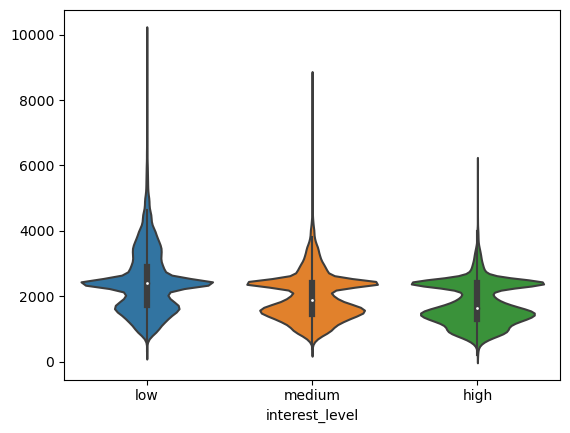

In [32]:
# Calculate Price / bedrooms
price_per_bedroom = train['price'] / train['bedrooms']

# Calculate Price / (bedrooms + bathrooms)
price_per_room = train['price'] / (train['bedrooms'] + train['bathrooms'])

# Replace infinity with median - due to occurrence of bedroom = 0 or bathroom = 0
price_per_bedroom = price_per_bedroom.replace([np.inf, -np.inf], price_per_bedroom.median())
price_per_room = price_per_room.replace([np.inf, -np.inf], price_per_room.median())

# Create a violin plot
sns.violinplot(x="interest_level", y=price_per_bedroom, order=['low', 'medium', 'high'],
               data=train[train['price'] <= train['price'].quantile(0.99)])

#### Pair Plot to visualize the price, latitude, longitude

Text(0.5, 0.98, 'Pair plot for rental listing dataset')

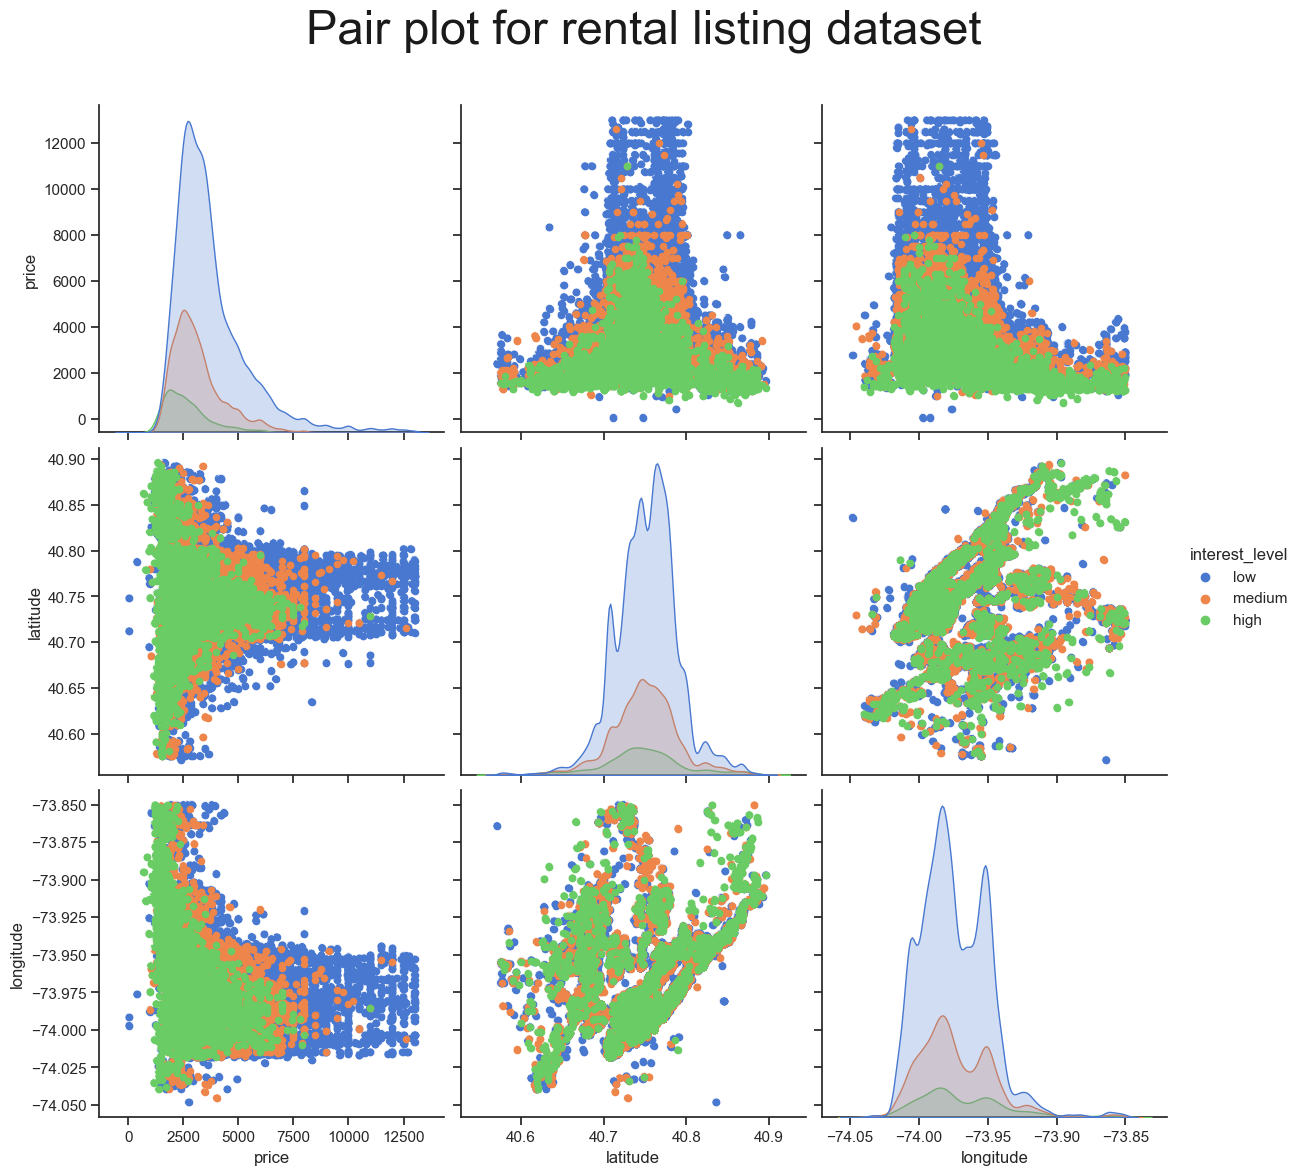

In [33]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="ticks")

# Change df_entire to train
train_ss = train[(train['price'] > 0) & (train['price'] < 20000) & (train['latitude'] < 40.9) & (train['latitude'] > 40.55) & (train['longitude'] < -73.85) & (train['longitude'] > -74.05)]

g = sns.pairplot(train_ss, palette="muted", markers='o', vars=['price', 'latitude', 'longitude'], height=4, hue='interest_level', hue_order=['low', 'medium', 'high'])
g = g.map_offdiag(plt.scatter, s=20)

# Remove the top and right lines in the graph
sns.despine()

# Additional adjustments for appearance
plt.subplots_adjust(top=0.9)

# Set the title of the graph
g.fig.suptitle('Pair plot for rental listing dataset', fontsize=34, color="k", alpha=1)


# Feature Engneering

#### Exploring manager_id (High Cardinality Data)

Exploring manager_id (High Cardinality Data)
First we check manager_id column and see that there are 3481 unique values there.
Count the number of listings by manager_id, and whether those listings belong to "high", "medium", or "low" interest. Cast as dataframe.
Sort dataframe by number of listings (regardless of interest) and by number of high interest level listings, and see that some manager_ids can be very informative in interest levels.
I also explored creating a Manager Skill feature.

In [34]:
train["manager_id"].describe()

count                                48871
unique                                3454
top       e6472c7237327dd3903b3d6f6a94515a
freq                                  2523
Name: manager_id, dtype: object

In [35]:
managerDF = train.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)
managerDF["sum"]=managerDF.sum(axis=1)
managerDF.head()

interest_level                    high   low  medium   sum
manager_id                                                
0000abd7518b94c35a90d64b56fbf3e6   0.0   4.0     8.0  12.0
001ce808ce1720e24a9510e014c69707   0.0  10.0     0.0  10.0
003fc4e9a70053082f131b1054966aaf   0.0   1.0     0.0   1.0
00607a02f6efd9c6c7c588826e471ee9   0.0   0.0     2.0   2.0
00995ff28d79127ed2dca8320e9e7d09   0.0   2.0     1.0   3.0

In [36]:
# sort by number of listings ("sum")
managerDF_sortby_sum = managerDF.sort_values(by="sum", ascending=0)
managerDF_sortby_sum.head(10)

interest_level                     high     low  medium     sum
manager_id                                                     
e6472c7237327dd3903b3d6f6a94515a  172.0  1729.0   622.0  2523.0
6e5c10246156ae5bdcd9b487ca99d96a    4.0   633.0    63.0   700.0
8f5a9c893f6d602f4953fcc0b8e6e9b4    1.0   404.0     4.0   409.0
62b685cc0d876c3a1a51d63a0d6a8082    0.0   399.0     0.0   399.0
cb87dadbca78fad02b388dc9e8f25a5b   55.0   132.0   183.0   370.0
9df32cb8dda19d3222d66e69e258616b   14.0   272.0    43.0   329.0
2aa9bfa5f67ed9997ea341dee8a3a271   38.0   163.0   115.0   316.0
b7de4cb395920136663132057fa89d84    0.0   310.0     4.0   314.0
1fb46c4a72bcf764ac35fc23f394760d   68.0   101.0   120.0   289.0
d2bce61e0e0079ebdc8c281e415e045b    1.0   212.0    53.0   266.0

We see that a prolific manager has posted 2533 listings. Next, let's specifically look at managers with "high" interest level listings.

In [37]:
# sort by high interest level
managerDF_sortby_high = managerDF.sort_values(by="high", ascending=0)
managerDF_sortby_high.head(10)

interest_level                     high     low  medium     sum
manager_id                                                     
e6472c7237327dd3903b3d6f6a94515a  172.0  1729.0   622.0  2523.0
1fb46c4a72bcf764ac35fc23f394760d   68.0   101.0   120.0   289.0
cb87dadbca78fad02b388dc9e8f25a5b   55.0   132.0   183.0   370.0
12c0a30e296faa0dfd422fe918d7d4f4   51.0    12.0    28.0    91.0
be1a7235af23dd77d0d1029dd5bfa5e9   43.0    10.0    38.0    91.0
2aa9bfa5f67ed9997ea341dee8a3a271   38.0   163.0   115.0   316.0
30a7951cfc21240e8c46b2d079d292e5   36.0    56.0    77.0   169.0
eb5a6c4c2eb6f3e2a085c477afd5a815   34.0    49.0    85.0   168.0
e90f2ded843cdb2efd65ef47d9fc8029   32.0    19.0    51.0   102.0
8365f1154ced533439de202ebada41e2   32.0     9.0    42.0    83.0

A little feature engineering attempt :
Creating a new "Manager Skill" variable based on the proportion of high, medium and low interest level listing that a manager gets.


In [38]:
# Create a DataFrame with fractions of "high," "medium," and "low" for each manager_id
fractions = pd.concat([train['manager_id'], pd.get_dummies(train['interest_level'])], axis=1).groupby('manager_id').mean()
fractions.columns = ['high_frac', 'low_frac', 'medium_frac']
fractions.head()

high_frac  low_frac  medium_frac
manager_id                                                        
0000abd7518b94c35a90d64b56fbf3e6        0.0  0.333333     0.666667
001ce808ce1720e24a9510e014c69707        0.0  1.000000     0.000000
003fc4e9a70053082f131b1054966aaf        0.0  1.000000     0.000000
00607a02f6efd9c6c7c588826e471ee9        0.0  0.000000     1.000000
00995ff28d79127ed2dca8320e9e7d09        0.0  0.666667     0.333333

In [39]:
fractions = pd.concat([train['manager_id'], pd.get_dummies(train['interest_level'])], axis=1).groupby('manager_id').mean()
fractions.columns = ['high_frac', 'low_frac', 'medium_frac']

# Calculate the 'manager_skill' score based on the fractions
fractions['manager_skill'] = fractions['high_frac']*3 + fractions['medium_frac']*2 + fractions['low_frac']

# Display the top managers based on 'manager_skill'
top_managers = fractions.sort_values(by='manager_skill', ascending=False)
top_managers.head(10)

high_frac  low_frac  medium_frac  \
manager_id                                                           
65056cd59c47f5e9f7a607119d056994        1.0       0.0          0.0   
328cf3b80ecdd84b08ea2661fd8e2b54        1.0       0.0          0.0   
a975f9f606ec4e0ed996aaae6ca7ae62        1.0       0.0          0.0   
3f871575cf195cb4bed8be0388747c6d        1.0       0.0          0.0   
23005d375414d02203c8edbad655eae2        1.0       0.0          0.0   
15316f3d64986e1b43086495d1ed2862        1.0       0.0          0.0   
bf077b3e472557cb660271eafe1629aa        1.0       0.0          0.0   
6bee09a2394a7af8a9c6febf12ee661f        1.0       0.0          0.0   
dd79fa83a023f2589c4df9e29b886d41        1.0       0.0          0.0   
6b896901ebf613eaac2a04f9b2c05566        1.0       0.0          0.0   

                                  manager_skill  
manager_id                                       
65056cd59c47f5e9f7a607119d056994            3.0  
328cf3b80ecdd84b08ea2661fd8e2b54            3.0  
a975f9f606ec4e0ed996aaae6ca7ae62            3.0  
3f871575cf195cb4bed8be0388747c6d            3.0  
23005d375414d02203c8edbad655eae2            3.0  
15316f3d64986e1b43086495d1ed2862            3.0  
bf077b3e472557cb660271eafe1629aa            3.0  
6bee09a2394a7af8a9c6febf12ee661f            3.0  
dd79fa83a023f2589c4df9e29b886d41            3.0  
6b896901ebf613eaac2a04f9b2c05566            3.0

In [40]:
unique_labels = top_managers['manager_skill'].value_counts()
print("Number of unique labels in 'manager_skill':", len(unique_labels))


Number of unique labels in 'manager_skill': 522


In [41]:
all_labels = top_managers['manager_skill'].unique()
print("All labels in 'manager_skill':")
for label in all_labels:
    print(label)


All labels in 'manager_skill':
3.0
2.8571428571428568
2.8333333333333335
2.8000000000000003
2.7777777777777777
2.75
2.7142857142857144
2.666666666666667
2.6666666666666665
2.6363636363636367
2.5833333333333335
2.5806451612903225
2.5769230769230766
2.571428571428571
2.543478260869565
2.533333333333333
2.518518518518518
2.5
2.4285714285714284
2.4166666666666665
2.413793103448276
2.4000000000000004
2.4
2.375
2.3626373626373627
2.3333333333333335
2.333333333333333
2.3125
2.3076923076923075
2.3015873015873014
2.3000000000000003
2.2962962962962963
2.2857142857142856
2.27710843373494
2.2727272727272725
2.25
2.2222222222222223
2.2
2.1999999999999997
2.1971830985915495
2.1764705882352944
2.176470588235294
2.166666666666667
2.1666666666666665
2.1643835616438354
2.153846153846154
2.1500000000000004
2.148148148148148
2.142857142857143
2.1333333333333333
2.127450980392157
2.125
2.112676056338028
2.111111111111111
2.1
2.090909090909091
2.0869565217391304
2.0833333333333335
2.083333333333333
2.08
2.0

In [42]:
# Assuming 'manager_id' is a common column in both dataframes
train = train.merge(top_managers[['manager_skill']], how='left', left_on='manager_id', right_index=True)

# Display the updated 'train' dataframe
train.head(5)


bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   
9      East 56th Street  [Doorman, Elevator, Laundry in Building, Laund...   
10  Metropolitan Avenue                                                 []   
15     East 34th Street  [Doorman, Elevator, Fitness Center, Laundry in...   

    latitude  listing_id  longitude                        manager_id  \
4    40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4   
6    40.7513     7092344   -73.9722  955db33477af4f40004820b4aed804a0   
9    40.7575     7158677   -73.9625  c8b10a317b766204f08e613cef4ce7a0   
10   40.7145     7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
15   40.7439     7225292   -73.9743  2c3b41f588fbb5234d8a1e885a436cfa   

                                               photos  price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...   2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...   3800   
9   [https://photos.renthop.com/2/7158677_c897a134...   3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
15  [https://photos.renthop.com/2/7225292_901f1984...   2795   

             street_address interest_level  manager_skill  
4       145 Borinquen Place         medium       1.526786  
6             230 East 44th            low       1.692308  
9      405 East 56th Street         medium       1.268817  
10  792 Metropolitan Avenue         medium       1.255556  
15     340 East 34th Street            low       1.145455

#### Exploring building_id

When we try to same exploration with building_id, it's pretty clear that there are missing values to be removed. I tried OneHotEncoder with building_id but settled with only using LabelEncoder for my model due to lower dimensionality.

In [43]:
# Assuming you have a DataFrame 'train' with 'building_id' and 'interest_level' columns
# Calculate counts for each building based on interest levels
buildingDF = train.groupby(['building_id', 'interest_level'])['building_id'].count().unstack('interest_level').fillna(0)
# Calculate the sum of counts for each building
buildingDF['sum'] = buildingDF.sum(axis=1)
# Display the resulting DataFrame
buildingDF.head()

interest_level                     high     low  medium     sum
building_id                                                    
0                                 195.0  7529.0   503.0  8227.0
00005cb939f9986300d987652c933e15    0.0     1.0     0.0     1.0
00024d77a43f0606f926e2312513845c    2.0     0.0     1.0     3.0
000ae4b7db298401cdae2b0ba1ea8146    0.0     0.0     1.0     1.0
0012f1955391bca600ec301035b97b65    0.0     1.0     0.0     1.0

In [44]:
buildingDF = buildingDF[buildingDF.index != '0']

In [45]:
# Sort the DataFrame by "sum" in descending order
buildingDF_sortby_sum = buildingDF.sort_values(by="sum", ascending=False)
# Display the top 10 buildings
top_10_buildings = buildingDF_sortby_sum.head(10)

In [46]:
# Sort the DataFrame by "sum" in descending order
buildingDF = buildingDF.sort_values(by="sum", ascending=False)

# Display the top 10 buildings
top_10_buildings = buildingDF.head(10)
top_10_buildings

interest_level                    high    low  medium    sum
building_id                                                 
96274288c84ddd7d5c5d8e425ee75027  21.0  179.0    75.0  275.0
11e1dec9d14b1a9e528386a2504b3afc  18.0  145.0    52.0  215.0
80a120d6bc3aba97f40fee8c2204524b  18.0  125.0    70.0  213.0
bb8658a3e432fb62a440615333376345  26.0  111.0    75.0  212.0
f68bf347f99df026f4faad43cc604048  14.0  116.0    61.0  191.0
c94301249b8c09429d329864d58e5b82   6.0  140.0    21.0  167.0
ce6d18bf3238e668b2bf23f4110b7b67  20.0   91.0    53.0  164.0
57ef86c28a8ae482dc3a3c3af28e8e48   7.0  103.0    49.0  159.0
128d4af0683efc5e1eded8dc8044d5e3  11.0  105.0    37.0  153.0
d0234abbc01a982d54e8d446acc03405  17.0   76.0    59.0  152.0

3. Exploring geographical features
Intuitively, location should be one of the crucial factors in apartment rent prices. The dataset provides us with longitude and latitude coordinates. It was a challenge trying to extracting the most information out of these columns.
The following section is informed by notebook from Darnal.

In [47]:
# Sort the DataFrame by "high" interest level in descending order
buildingDF_sortby_sum = buildingDF.sort_values(by="high", ascending=False)

# Display the top 10 buildings
top_10_buildings = buildingDF_sortby_sum.head(10)
top_10_buildings

interest_level                    high    low  medium    sum
building_id                                                 
bb8658a3e432fb62a440615333376345  26.0  111.0    75.0  212.0
5565db9b7cba3603834c4aa6f2950960  25.0   55.0    46.0  126.0
093f64f52a6e43ba5e8f12bec8200554  22.0   58.0    48.0  128.0
96274288c84ddd7d5c5d8e425ee75027  21.0  179.0    75.0  275.0
80911ce8a425daf4989ea8a4bccc41a7  21.0   48.0    43.0  112.0
ce6d18bf3238e668b2bf23f4110b7b67  20.0   91.0    53.0  164.0
be6b7c3fdf3f63a2756306f4af7788a6  18.0   20.0    41.0   79.0
11e1dec9d14b1a9e528386a2504b3afc  18.0  145.0    52.0  215.0
80a120d6bc3aba97f40fee8c2204524b  18.0  125.0    70.0  213.0
d0234abbc01a982d54e8d446acc03405  17.0   76.0    59.0  152.0

In [48]:
buildingDF

interest_level                    high    low  medium    sum
building_id                                                 
96274288c84ddd7d5c5d8e425ee75027  21.0  179.0    75.0  275.0
11e1dec9d14b1a9e528386a2504b3afc  18.0  145.0    52.0  215.0
80a120d6bc3aba97f40fee8c2204524b  18.0  125.0    70.0  213.0
bb8658a3e432fb62a440615333376345  26.0  111.0    75.0  212.0
f68bf347f99df026f4faad43cc604048  14.0  116.0    61.0  191.0
...                                ...    ...     ...    ...
744afce3156a96d49231cb9a61ebed45   1.0    0.0     0.0    1.0
743734cd07225f47b51cfbef84296246   0.0    0.0     1.0    1.0
7415bbfdf46379399dc96d4a5f5032b9   0.0    1.0     0.0    1.0
73f29f7c9642f1eea9fe0c0b85c95b1a   1.0    0.0     0.0    1.0
80b14b8f6769371b821c3bf7a3778947   0.0    1.0     0.0    1.0

[7519 rows x 4 columns]

In [49]:
# Assuming 'building_id' is a common column in both dataframes
train = train.merge(buildingDF_sortby_sum[['sum']], how='left', left_on='building_id', right_index=True)

# Rename the 'sum' column to 'building_id_transform'
train.rename(columns={'sum': 'building_id_transform'}, inplace=True)

# Display the updated 'train' dataframe with the new attribute
train.head(5)

bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   
9      East 56th Street  [Doorman, Elevator, Laundry in Building, Laund...   
10  Metropolitan Avenue                                                 []   
15     East 34th Street  [Doorman, Elevator, Fitness Center, Laundry in...   

    latitude  listing_id  longitude                        manager_id  \
4    40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4   
6    40.7513     7092344   -73.9722  955db33477af4f40004820b4aed804a0   
9    40.7575     7158677   -73.9625  c8b10a317b766204f08e613cef4ce7a0   
10   40.7145     7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
15   40.7439     7225292   -73.9743  2c3b41f588fbb5234d8a1e885a436cfa   

                                               photos  price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...   2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...   3800   
9   [https://photos.renthop.com/2/7158677_c897a134...   3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
15  [https://photos.renthop.com/2/7225292_901f1984...   2795   

             street_address interest_level  manager_skill  \
4       145 Borinquen Place         medium       1.526786   
6             230 East 44th            low       1.692308   
9      405 East 56th Street         medium       1.268817   
10  792 Metropolitan Avenue         medium       1.255556   
15     340 East 34th Street            low       1.145455   

    building_id_transform  
4                     5.0  
6                    51.0  
9                    71.0  
10                    3.0  
15                   86.0

Length before removing outliers 48871
Length after removing outliers 46511


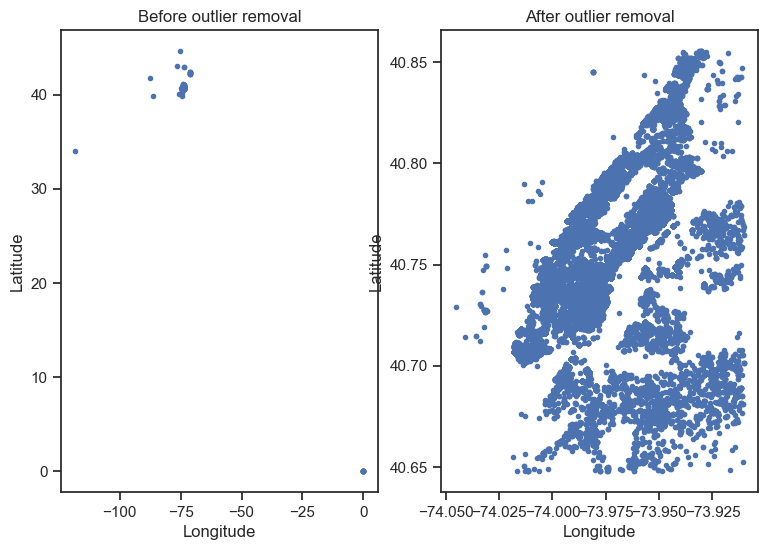

In [50]:
# Create a DataFrame 'train' with your dataset

fig, ax = plt.subplots(1, 2, figsize=(9, 6))
print('Length before removing outliers', len(train))

# Plot the data before outlier removal
ax[0].plot(train.longitude, train.latitude, '.')
ax[0].set_title('Before outlier removal')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Outlier removal
for col in ['latitude', 'longitude']:
    while True:
        median_val = train[col].median()
        std_val = train[col].std()
        ix = abs(train[col] - median_val) > 3 * std_val
        if ix.sum() == 0:  # no more outliers -> stop
            break
        train.loc[ix, col] = np.nan  # exclude outliers

# Keep only non-outlier listings
train = train.dropna(subset=['latitude', 'longitude'])
print('Length after removing outliers', len(train))

# Show location coordinates after outlier removal
ax[1].plot(train.longitude, train.latitude, '.')
ax[1].set_title('After outlier removal')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

plt.show()


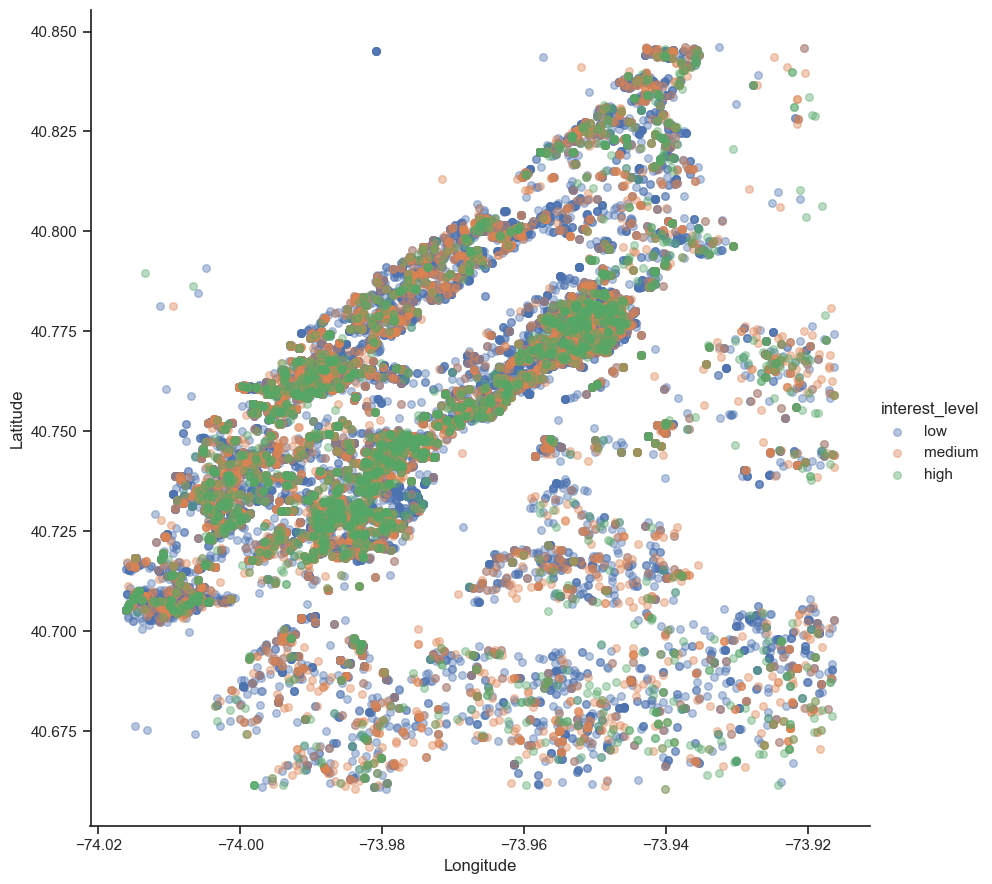

In [51]:
# Adjust the DataFrame and column names according to your dataset
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], height=9, scatter_kws={'alpha': 0.4, 's': 30},
           data=train[(train.longitude > train.longitude.quantile(0.005))
                      & (train.longitude < train.longitude.quantile(0.995))
                      & (train.latitude > train.latitude.quantile(0.005))
                      & (train.latitude < train.latitude.quantile(0.995))])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [52]:
num_map = {'high':1, 'medium':0.5, 'low':0}
train['interest_level'] = train['interest_level'].apply(lambda x: num_map[x])

Exploring longitude, latitude

One possibility is to encode neighborhoods using k-means clustering. Result: Due to overlapping clusters, even when increasing ncomp to 100 or even higher, the predictive value of this cluster label is limited.
External data including the actual map of New York City are forbidden for use in this competition. However, it is possible to approximate which of the five boroughs the apartment listing belongs to by using the centroids of 5 clusters based on k-means.

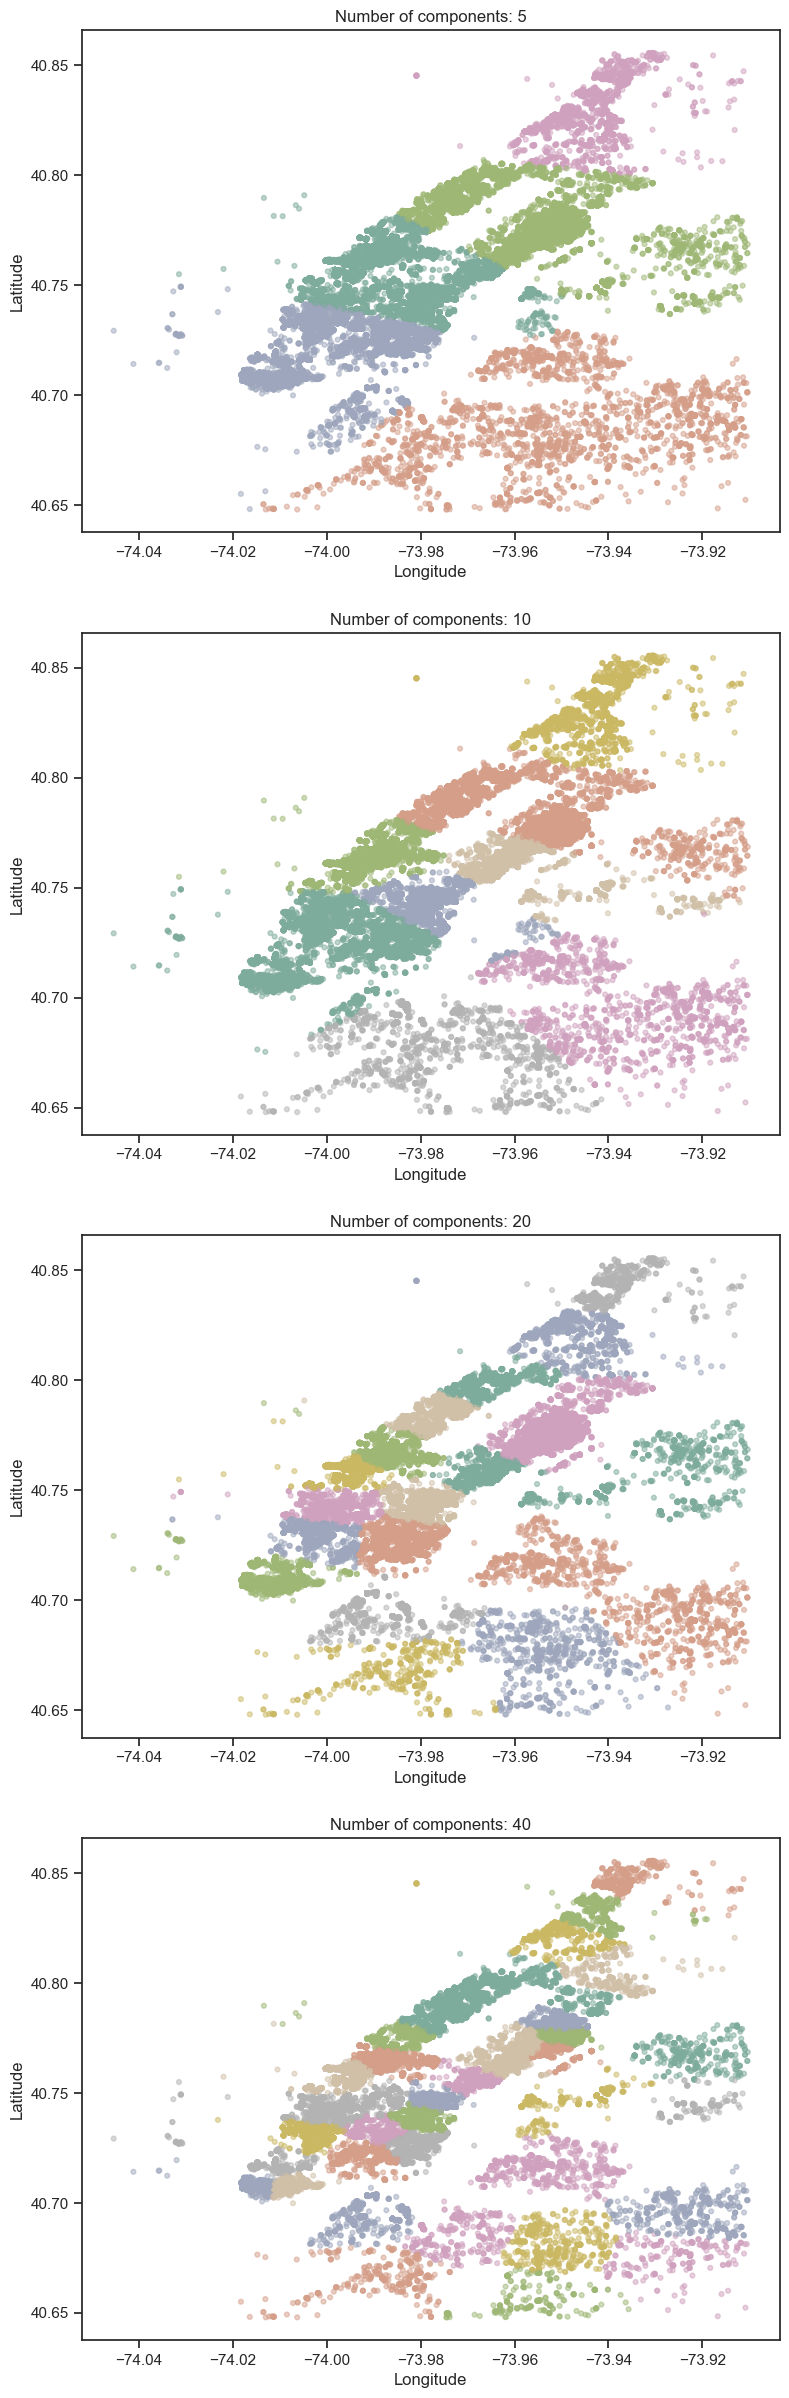

In [53]:
# Create subplots
fig, ax = plt.subplots(4, 1, figsize=(9, 30))

for ix, ncomp in enumerate([5, 10, 20, 40]): 
    r = KMeans(ncomp, random_state=1)
    
    # Normalize longitude and latitude (if needed)
    temp = train[['longitude', 'latitude']].copy()
    
    # Fit k-means and get labels
    r.fit(temp)
    
    # Plot results
    cols = sns.color_palette("Set2", n_colors=ncomp, desat=0.5)
    cl = [cols[i] for i in r.labels_]
    area = 12
    ax[ix].scatter(train.longitude, train.latitude, s=area, c=cl, alpha=0.5)
    ax[ix].set_title('Number of components: ' + str(ncomp))
    ax[ix].set_xlabel('Longitude')
    ax[ix].set_ylabel('Latitude')

plt.show()

In [54]:
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'train' with 'longitude' and 'latitude' columns

# Create a KMeans model with 5 clusters
k = KMeans(n_clusters=5, random_state=1)

# Normalize longitude and latitude (if needed)
data = train[['longitude', 'latitude']].copy()
data['longitude'] = (data['longitude'] - data['longitude'].mean()) / data['longitude'].std()
data['latitude'] = (data['latitude'] - data['latitude'].mean()) / data['latitude'].std()

# Fit the KMeans model to your data
k.fit(data)

# Get the centroids of the clusters
centroids = k.cluster_centers_

# Display the centroids
print(centroids)


[[-1.19873773 -1.05201639]
 [ 0.86932709  0.73040215]
 [-0.41036566 -0.04111305]
 [ 1.43908153  2.13739704]
 [ 1.3072469  -1.70383634]]


In [55]:
data['longitude']

4         0.985742
6         0.159931
9         0.597656
10        1.500182
15        0.065166
            ...   
123998   -0.720031
124000    1.631048
124002    0.809750
124008   -1.171294
124009    0.205057
Name: longitude, Length: 46511, dtype: float64

In [56]:
data['latitude']

4        -1.182688
6        -0.007737
9         0.172132
10       -1.075347
15       -0.222420
            ...   
123998    0.360704
124000    2.661285
124002    1.979524
124008   -0.196310
124009    0.227253
Name: latitude, Length: 46511, dtype: float64

#### Exploring Manager Id 

In [57]:
managers_train = train[['manager_id', 'interest_level']]
managers_test = test['manager_id']

In [58]:
managers_all = pd.concat([managers_train['manager_id'], managers_test], ignore_index = True)


In [59]:
train[['manager_id', 'interest_level']].shape


(46511, 2)

In [60]:
sum(managers_all.value_counts() > 20)


1143

In [61]:
sum(managers_train['manager_id'].value_counts() >= 10)


1006

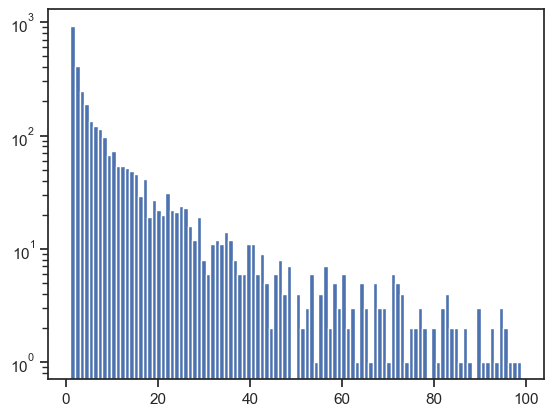

In [62]:
plt.hist(managers_train['manager_id'].value_counts()[60:], bins = 100)
plt.yscale('log')

In [63]:
counts = managers_train['manager_id'].value_counts()


In [64]:
len(counts.index[counts >= 10])


1006

In [65]:
managers_train['manager_count'] = managers_train.groupby('manager_id').transform(len)


In [66]:
np.mean(managers_train['manager_count'] >= 10)


0.8529595149534519

In [67]:
dict(zip([1, 2], [3, 4]))


{1: 3, 2: 4}

In [68]:
class CategoricalFilter(object):
    
    def __init__(self, top_categories = 999):
        self.top_categories = top_categories
    
    def fit(self, series):
        counts = series.value_counts()
        self.category_mapper = dict(zip(counts.index[:self.top_categories],
                                    range(1, self.top_categories + 1)))
    
    def transform(self, series):
        return series.apply(lambda key: self.category_mapper.get(key, 0))

In [69]:
catfilter = CategoricalFilter()


In [70]:
catfilter.fit(managers_train['manager_id'])


In [71]:
transformed_managers = catfilter.transform(managers_train['manager_id'])


In [72]:
train['transformed_managers'] = transformed_managers
transformed_managers.head(20)


4     194
6     400
9      71
10     77
15    172
16     26
18     31
19     45
23    284
32    339
33    310
36      0
38     48
39    265
42    264
43    652
44    866
46      0
49    433
61      0
Name: manager_id, dtype: int64

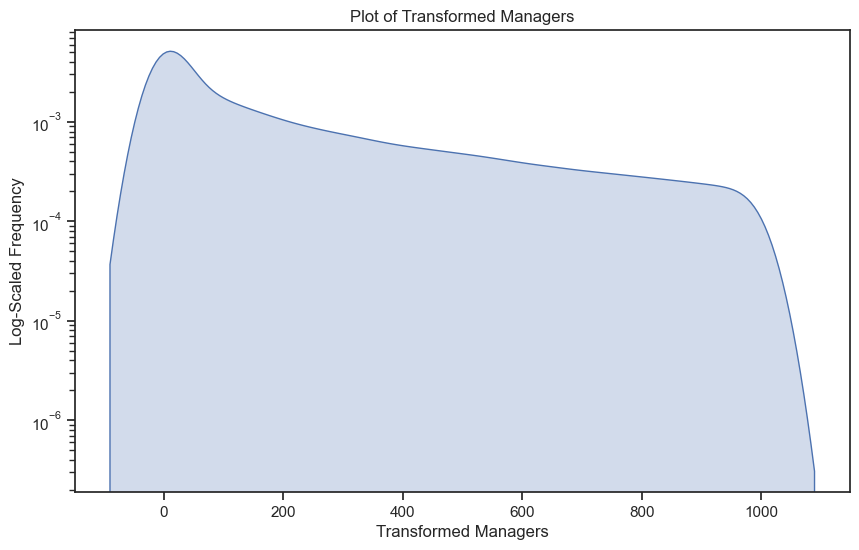

In [73]:
plt.figure(figsize=(10, 6))
sns.kdeplot(transformed_managers, shade=True, color="b")
plt.yscale('log')
plt.xlabel('Transformed Managers')
plt.ylabel('Log-Scaled Frequency')
plt.title('Plot of Transformed Managers')
plt.show()

In [74]:
transformed_test = catfilter.transform(managers_test)


In [75]:
np.mean(transformed_test == 0)


0.17775485875781888

In [76]:
np.mean(transformed_managers == 0)


0.14854550536432243

In [77]:
train["num_features"] = train["features"].apply(len)


In [78]:
train["num_photos"] = train["photos"].apply(len)


In [79]:
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))

In [80]:
# adding all these new features to use list #
#features_to_use.extend(["num_photos", "num_features", "num_description_words","created_year", "created_month", "created_day", "listing_id", "created_hour"])

In [81]:
interest_level_mapping = {0 : 0, 0.5 : 1, 1: 2}
train['interest_level'] = train['interest_level'].map(interest_level_mapping)
train.head(5)

bathrooms  bedrooms                       building_id  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a   
6         1.0         2  b8e75fc949a6cd8225b455648a951712   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15        1.0         0  bfb9405149bfff42a92980b594c28234   

                created                                        description  \
4   2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6   2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9   2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10  2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15  2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   

        display_address                                           features  \
4   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   
6             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   
9      East 56th Street  [Doorman, Elevator, Laundry in Building, Laund...   
10  Metropolitan Avenue                                                 []   
15     East 34th Street  [Doorman, Elevator, Fitness Center, Laundry in...   

    latitude  listing_id  longitude  ...  \
4    40.7108     7170325   -73.9539  ...   
6    40.7513     7092344   -73.9722  ...   
9    40.7575     7158677   -73.9625  ...   
10   40.7145     7211212   -73.9425  ...   
15   40.7439     7225292   -73.9743  ...   

                                               photos price  \
4   [https://photos.renthop.com/2/7170325_3bb5ac84...  2400   
6   [https://photos.renthop.com/2/7092344_7663c19a...  3800   
9   [https://photos.renthop.com/2/7158677_c897a134...  3495   
10  [https://photos.renthop.com/2/7211212_1ed4542e...  3000   
15  [https://photos.renthop.com/2/7225292_901f1984...  2795   

             street_address interest_level  manager_skill  \
4       145 Borinquen Place              1       1.526786   
6             230 East 44th              0       1.692308   
9      405 East 56th Street              1       1.268817   
10  792 Metropolitan Avenue              1       1.255556   
15     340 East 34th Street              0       1.145455   

    building_id_transform  transformed_managers  num_features  num_photos  \
4                     5.0                   194             7          12   
6                    51.0                   400             6           6   
9                    71.0                    71             6           6   
10                    3.0                    77             0           5   
15                   86.0                   172             4           4   

    num_description_words  
4                      77  
6                     131  
9                     119  
10                     95  
15                     41  

[5 rows x 21 columns]

In [82]:
train['created'] = pd.to_datetime(train['created'])
train['date'] = train['created'].dt.day
train['month'] = train['created'].dt.month
train['year'] = train['created'].dt.year
train.head(5)

bathrooms  bedrooms                       building_id             created  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a 2016-06-16 05:55:27   
6         1.0         2  b8e75fc949a6cd8225b455648a951712 2016-06-01 05:44:33   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49 2016-06-14 15:19:59   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85 2016-06-24 07:54:24   
15        1.0         0  bfb9405149bfff42a92980b594c28234 2016-06-28 03:50:23   

                                          description      display_address  \
4   Spacious 1 Bedroom 1 Bathroom in Williamsburg!...  145 Borinquen Place   
6   BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...            East 44th   
9   **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...     East 56th Street   
10  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
15  Over-sized Studio w abundant closets. Availabl...     East 34th Street   

                                             features  latitude  listing_id  \
4   [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   
6   [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   
9   [Doorman, Elevator, Laundry in Building, Laund...   40.7575     7158677   
10                                                 []   40.7145     7211212   
15  [Doorman, Elevator, Fitness Center, Laundry in...   40.7439     7225292   

    longitude  ... interest_level manager_skill  building_id_transform  \
4    -73.9539  ...              1      1.526786                    5.0   
6    -73.9722  ...              0      1.692308                   51.0   
9    -73.9625  ...              1      1.268817                   71.0   
10   -73.9425  ...              1      1.255556                    3.0   
15   -73.9743  ...              0      1.145455                   86.0   

   transformed_managers  num_features  num_photos  num_description_words  \
4                   194             7          12                     77   
6                   400             6           6                    131   
9                    71             6           6                    119   
10                   77             0           5                     95   
15                  172             4           4                     41   

    date  month  year  
4     16      6  2016  
6      1      6  2016  
9     14      6  2016  
10    24      6  2016  
15    28      6  2016  

[5 rows x 24 columns]

In [83]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
train['combined_date'] = train['date'].astype(str) + '-' + train['month'].astype(str) + '-' + train['year'].astype(str)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'combined_date' attribute
train['combined_date_encoded'] = label_encoder.fit_transform(train['combined_date'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'combined_date_encoded' attribute
train['combined_date_normalized'] = scaler.fit_transform(train['combined_date_encoded'].values.reshape(-1, 1))

# Display the first few rows of the updated dataset

# Now, you can use the 'combined_date_normalized' attribute as a numeric feature for training your machine learning model.


In [84]:
for feature in ['description', 'features']:
    if feature == 'features':
        # Flatten the lists of features and then count unique labels
        unique_labels = len(set(item for sublist in train[feature] for item in sublist))
    else:
        # For non-list columns, count unique labels directly
        unique_labels = len(train[feature].unique())
    print(f"{feature}: {unique_labels} labels")


description: 36120 labels
features: 1469 labels


In [85]:
unique_feature_labels = set(item for sublist in train['features'] for item in sublist)
print("Unique labels in 'features':")
for label in unique_feature_labels:
    print(label)

Unique labels in 'features':
Childrens Playroom
walk in closet
** NO FEE MULTI-LEVEL MANSION! * MASSIVE 3BR TRIPLEX * HUGE PRIVATE TERRACE * E50s & PARK AVE * ELEV/LNDRY BLDG **
Ample Closet Space
** OVERSIZED 3BR HOME * SPARKLING CLEAN * TONS OF NATURAL LIGHT * 2 BLKS TO THE WATERFRONT & BEDFORD L STOP **
Easy Qualification
30
balocny
Short term
Large rooms
Home Office
an expansive landscaped terrace and sun deck
Large Closets
Garden
Pets: Case by case
on-site parking
Live Work
Rent stabilized
Billiards and Shuffle Board Game Room Poker room Golf Simulator and Putting Green
Exposed brick wall
Sauna
Green building
Offering  1 month free OR 1 month OP
WiFi Access
Brand New Appliances
Exposed BrickHardwood Floors MicrowaveRenovated open view Excellent
Valet services including dry cleaning
private patio
Laundry facility on every floor
ALL UTILITIES INCLUDED
Deck
Bike room
Oversized window
2
4th floor Walk Up
Housekeeping
HARDWOOD
Queen Sized Bedroom
Bicycle Room
Laundry on every floor
lof

In [86]:
train.head(5)

bathrooms  bedrooms                       building_id             created  \
4         1.0         1  8579a0b0d54db803821a35a4a615e97a 2016-06-16 05:55:27   
6         1.0         2  b8e75fc949a6cd8225b455648a951712 2016-06-01 05:44:33   
9         1.0         2  cd759a988b8f23924b5a2058d5ab2b49 2016-06-14 15:19:59   
10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85 2016-06-24 07:54:24   
15        1.0         0  bfb9405149bfff42a92980b594c28234 2016-06-28 03:50:23   

                                          description      display_address  \
4   Spacious 1 Bedroom 1 Bathroom in Williamsburg!...  145 Borinquen Place   
6   BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...            East 44th   
9   **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...     East 56th Street   
10  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
15  Over-sized Studio w abundant closets. Availabl...     East 34th Street   

                                             features  latitude  listing_id  \
4   [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   
6   [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   
9   [Doorman, Elevator, Laundry in Building, Laund...   40.7575     7158677   
10                                                 []   40.7145     7211212   
15  [Doorman, Elevator, Fitness Center, Laundry in...   40.7439     7225292   

    longitude  ... transformed_managers num_features  num_photos  \
4    -73.9539  ...                  194            7          12   
6    -73.9722  ...                  400            6           6   
9    -73.9625  ...                   71            6           6   
10   -73.9425  ...                   77            0           5   
15   -73.9743  ...                  172            4           4   

   num_description_words  date  month  year  combined_date  \
4                     77    16      6  2016      16-6-2016   
6                    131     1      6  2016       1-6-2016   
9                    119    14      6  2016      14-6-2016   
10                    95    24      6  2016      24-6-2016   
15                    41    28      6  2016      28-6-2016   

    combined_date_encoded  combined_date_normalized  
4                      23                  0.258427  
6                       2                  0.022472  
9                      17                  0.191011  
10                     50                  0.561798  
15                     62                  0.696629  

[5 rows x 27 columns]

# feature selection

Feature Selection- Correlation
In this step we will be removing the features which are highly correlated

In [87]:
numeric_data_types = [np.float64, np.float32, np.int64, np.int32]
numeric_columns = train.select_dtypes(include=numeric_data_types)
attribute_names = numeric_columns.columns.tolist()
attribute_names


['bathrooms',
 'bedrooms',
 'latitude',
 'listing_id',
 'longitude',
 'price',
 'interest_level',
 'manager_skill',
 'building_id_transform',
 'transformed_managers',
 'num_features',
 'num_photos',
 'num_description_words',
 'date',
 'month',
 'year',
 'combined_date_encoded',
 'combined_date_normalized']

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train[
['bathrooms',
 'bedrooms',
 'latitude',
 'listing_id',
 'longitude',
 'price',
 'manager_skill',
 'building_id_transform',
 'transformed_managers',
 'num_features',
 'num_photos',
 'num_description_words',
 'date',
 'month',
 'combined_date_encoded',
 'combined_date_normalized', 'interest_level']],train['interest_level'],test_size=0.3,random_state=100)

In [89]:
x_train.isnull().sum()

bathrooms                      0
bedrooms                       0
latitude                       0
listing_id                     0
longitude                      0
price                          0
manager_skill                  0
building_id_transform       5482
transformed_managers           0
num_features                   0
num_photos                     0
num_description_words          0
date                           0
month                          0
combined_date_encoded          0
combined_date_normalized       0
interest_level                 0
dtype: int64

In [90]:
x_train['building_id_transform'].fillna(0, inplace=True)
x_test['building_id_transform'].fillna(0, inplace=True)
x_train.isnull().sum()


bathrooms                   0
bedrooms                    0
latitude                    0
listing_id                  0
longitude                   0
price                       0
manager_skill               0
building_id_transform       0
transformed_managers        0
num_features                0
num_photos                  0
num_description_words       0
date                        0
month                       0
combined_date_encoded       0
combined_date_normalized    0
interest_level              0
dtype: int64

<Axes: >

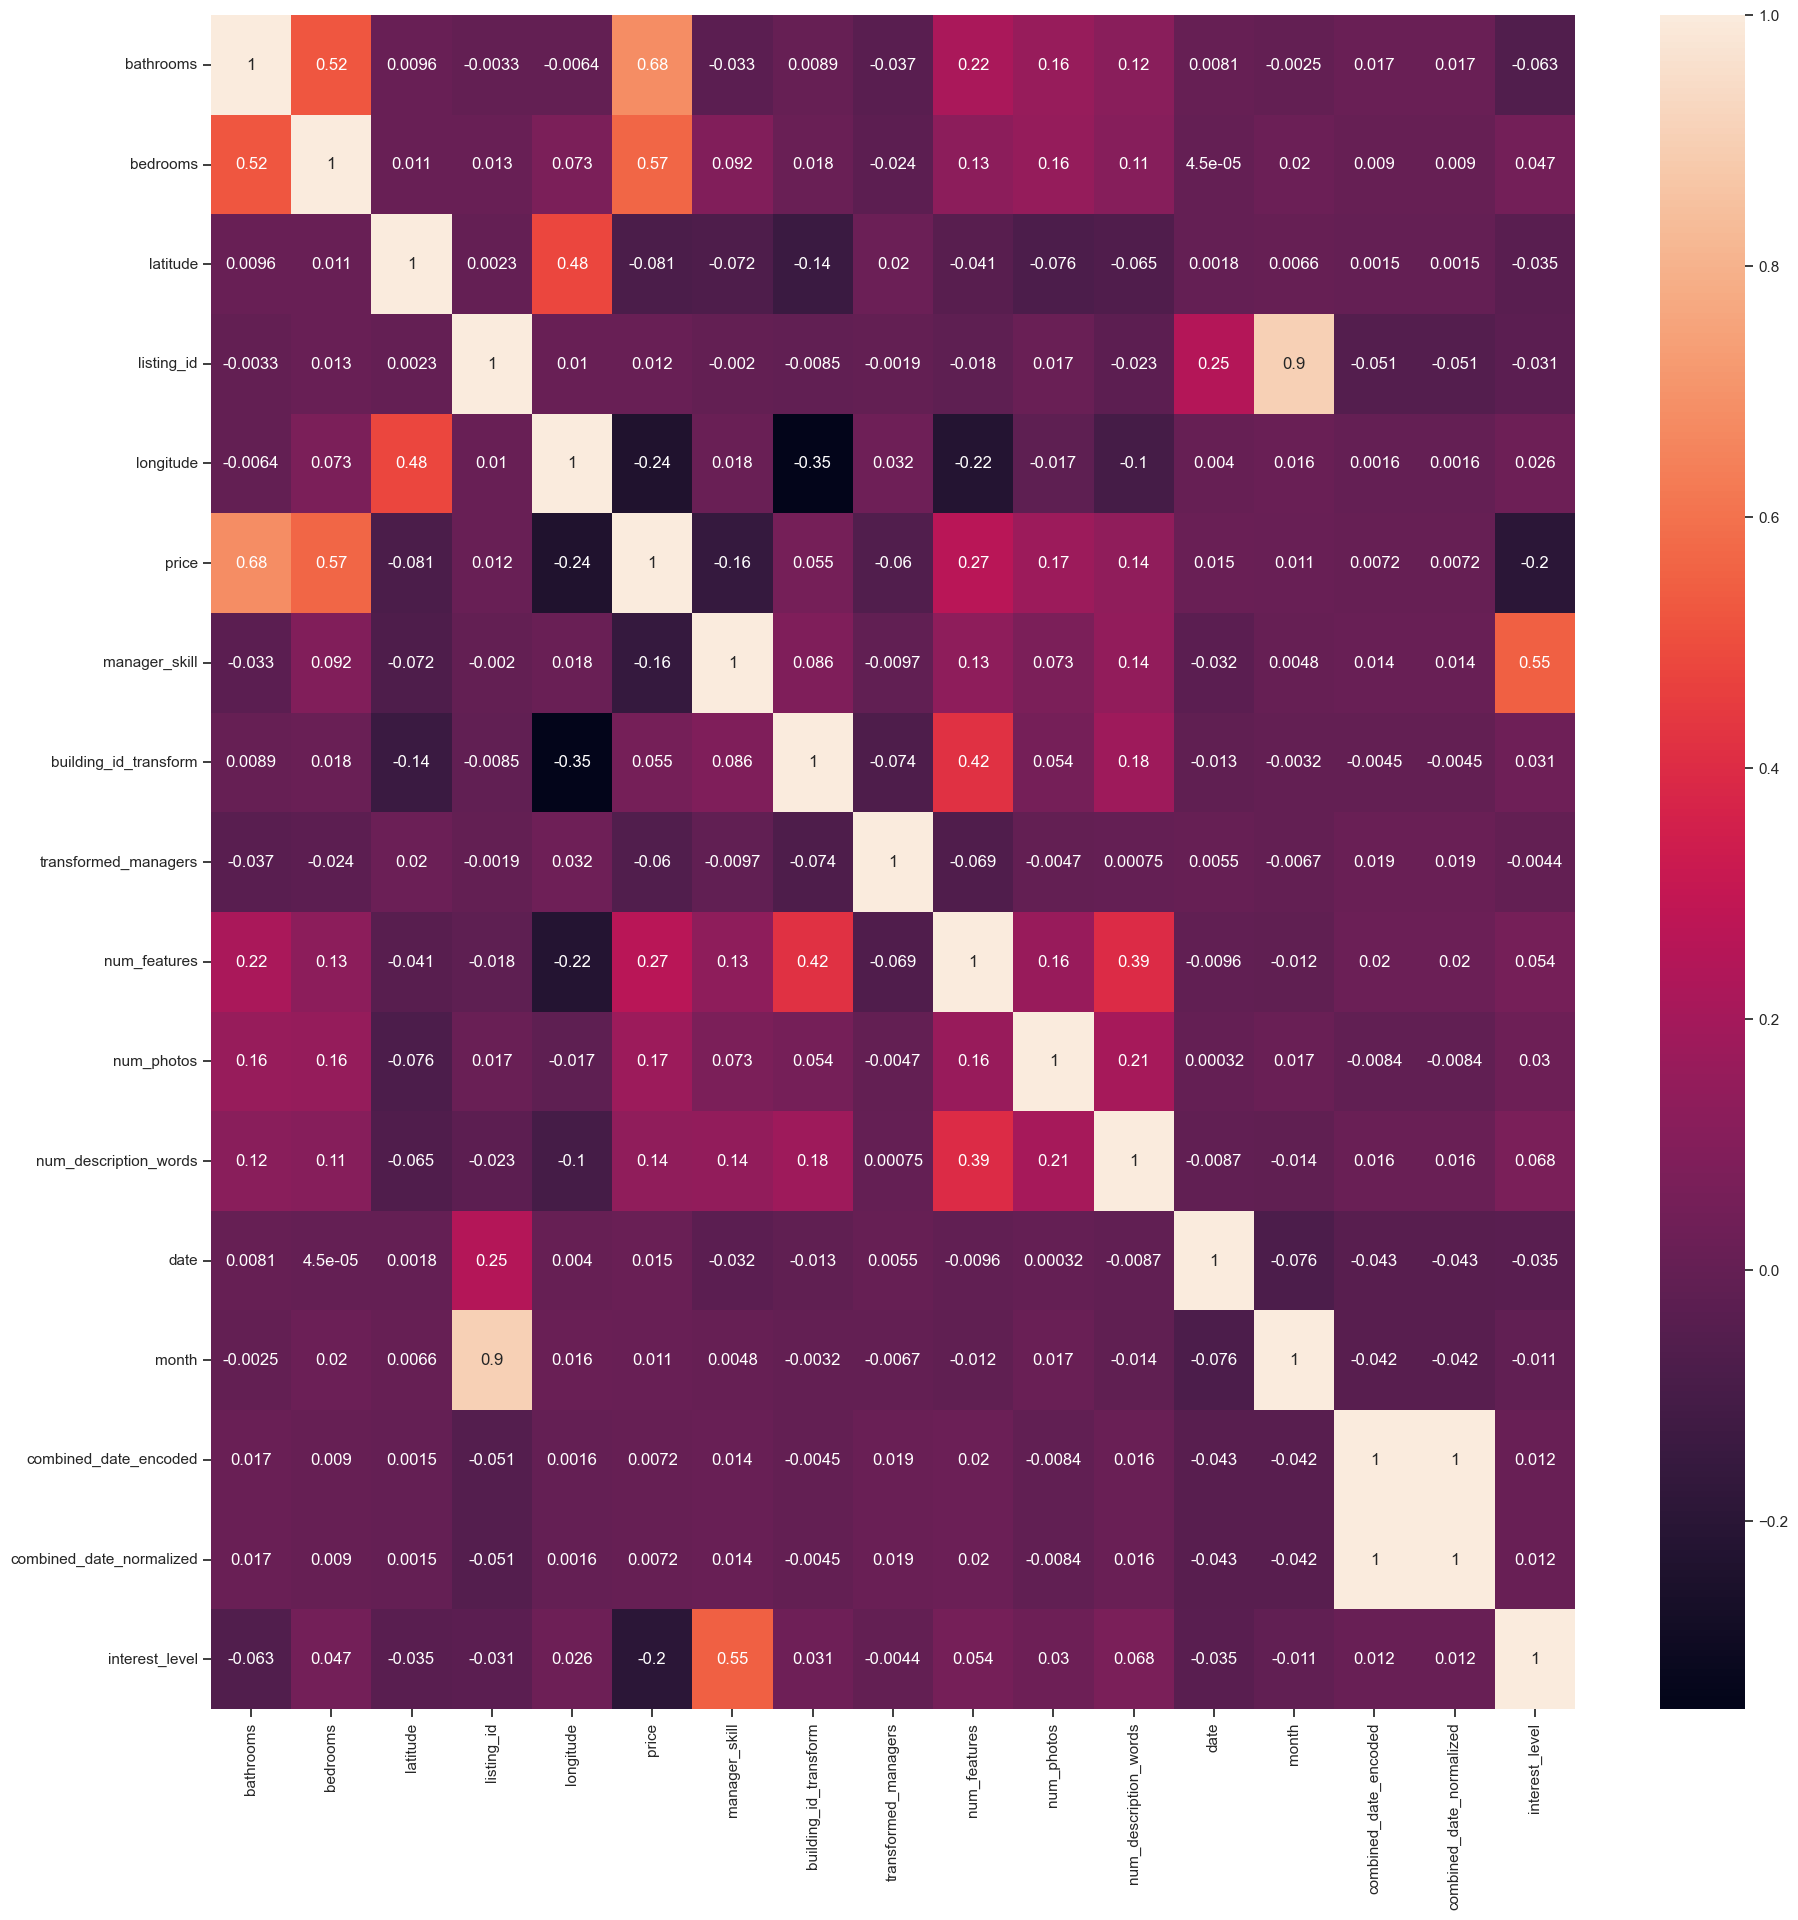

In [91]:
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(22,22)
sns.heatmap(corrmat,annot=True)

#### CHI SQUARE feature prediction

Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train[
['bathrooms',
 'bedrooms',
 'latitude',
 'listing_id',
 'price',
 'manager_skill',
 'building_id_transform',
 'transformed_managers',
 'num_features',
 'num_photos',
 'num_description_words',
 'date',
 'month',
 'combined_date_encoded',
 'combined_date_normalized', 'interest_level']],train['interest_level'],test_size=0.3,random_state=100)

In [93]:
x_train['building_id_transform'].fillna(0, inplace=True)
x_test['building_id_transform'].fillna(0, inplace=True)
x_train.isnull().sum()

bathrooms                   0
bedrooms                    0
latitude                    0
listing_id                  0
price                       0
manager_skill               0
building_id_transform       0
transformed_managers        0
num_features                0
num_photos                  0
num_description_words       0
date                        0
month                       0
combined_date_encoded       0
combined_date_normalized    0
interest_level              0
dtype: int64

In [94]:
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)

In [95]:
f_p_values


(array([2.26253376e+01, 8.03223210e+01, 1.13695667e-03, 7.74115288e+04,
        8.86542492e+05, 8.35162309e+02, 7.71555174e+03, 3.68899180e+02,
        5.12246118e+02, 8.55764835e+01, 8.47023669e+03, 1.89741022e+02,
        6.81544858e-01, 9.33233270e+01, 1.04857671e+00, 3.29247604e+04]),
 array([1.22171630e-005, 3.61600988e-018, 9.99431683e-001, 0.00000000e+000,
        0.00000000e+000, 4.43413476e-182, 0.00000000e+000, 7.84441871e-081,
        5.85017397e-112, 2.61398272e-019, 0.00000000e+000, 6.28435413e-042,
        7.11220743e-001, 5.43371706e-021, 5.91976492e-001, 0.00000000e+000]))

In [96]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

bathrooms                    1.221716e-05
bedrooms                     3.616010e-18
latitude                     9.994317e-01
listing_id                   0.000000e+00
price                        0.000000e+00
manager_skill               4.434135e-182
building_id_transform        0.000000e+00
transformed_managers         7.844419e-81
num_features                5.850174e-112
num_photos                   2.613983e-19
num_description_words        0.000000e+00
date                         6.284354e-42
month                        7.112207e-01
combined_date_encoded        5.433717e-21
combined_date_normalized     5.919765e-01
interest_level               0.000000e+00
dtype: float64

In [97]:
p_values.sort_index(ascending=False)


transformed_managers         7.844419e-81
price                        0.000000e+00
num_photos                   2.613983e-19
num_features                5.850174e-112
num_description_words        0.000000e+00
month                        7.112207e-01
manager_skill               4.434135e-182
listing_id                   0.000000e+00
latitude                     9.994317e-01
interest_level               0.000000e+00
date                         6.284354e-42
combined_date_normalized     5.919765e-01
combined_date_encoded        5.433717e-21
building_id_transform        0.000000e+00
bedrooms                     3.616010e-18
bathrooms                    1.221716e-05
dtype: float64

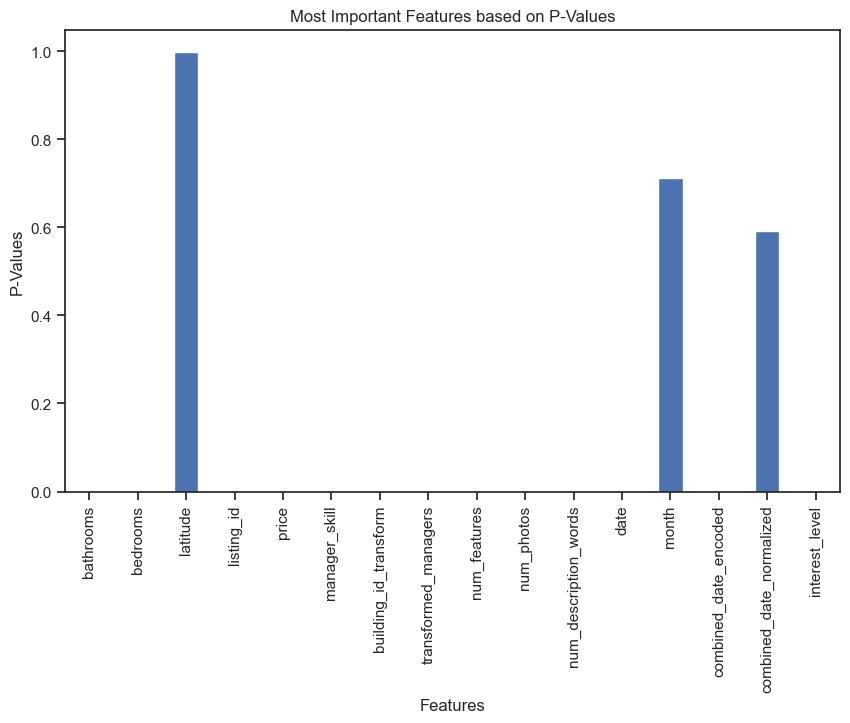

In [98]:
# Create a bar plot to visualize the most important features
plt.figure(figsize=(10, 6))
p_values.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('P-Values')
plt.title('Most Important Features based on P-Values')
plt.show()


Feature Selection-Information gain - mutual information In Regression

In [99]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train.fillna(0), y_train)
mutual_info

array([0.01190522, 0.00819519, 0.03877715, 0.0535464 , 0.05230083,
       0.1834877 , 0.04364191, 0.12526417, 0.00405032, 0.02718565,
       0.01711808, 0.        , 0.00171685, 0.00992311, 0.00333613,
       0.76673536])

In [100]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

interest_level              0.766735
manager_skill               0.183488
transformed_managers        0.125264
listing_id                  0.053546
price                       0.052301
building_id_transform       0.043642
latitude                    0.038777
num_photos                  0.027186
num_description_words       0.017118
bathrooms                   0.011905
combined_date_encoded       0.009923
bedrooms                    0.008195
num_features                0.004050
combined_date_normalized    0.003336
month                       0.001717
date                        0.000000
dtype: float64

<Axes: >

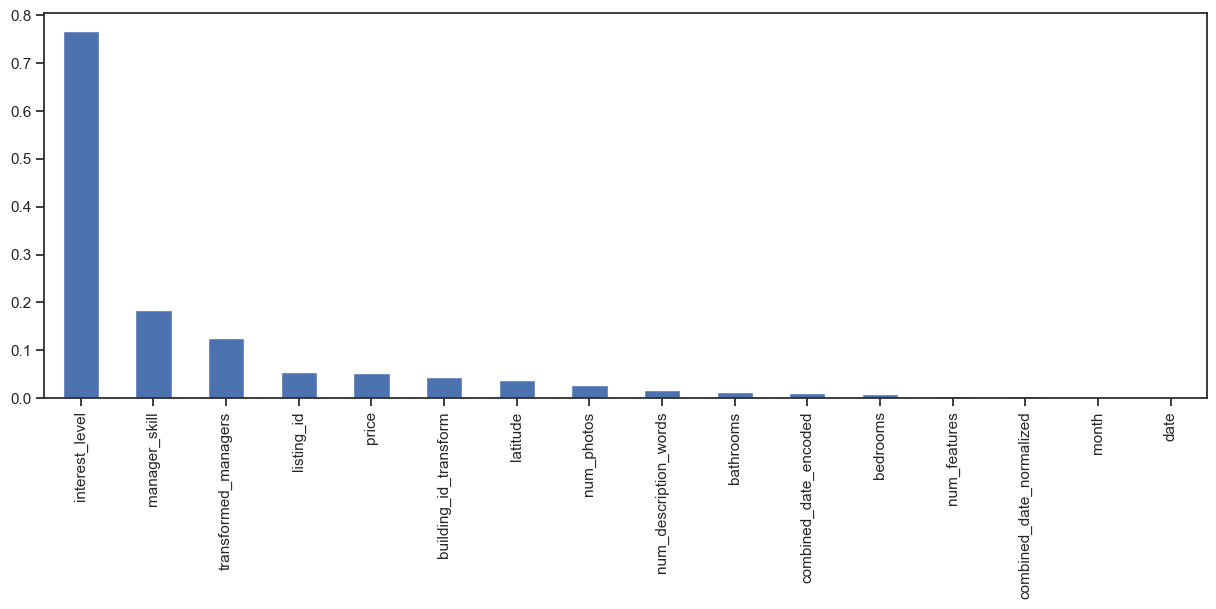

In [101]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [102]:
#list of all numeric data
numeric_data_types = [np.float64, np.float32, np.int64, np.int32]
numeric_columns = train.select_dtypes(include=numeric_data_types)
attribute_names = numeric_columns.columns.tolist()
attribute_names

['bathrooms',
 'bedrooms',
 'latitude',
 'listing_id',
 'longitude',
 'price',
 'interest_level',
 'manager_skill',
 'building_id_transform',
 'transformed_managers',
 'num_features',
 'num_photos',
 'num_description_words',
 'date',
 'month',
 'year',
 'combined_date_encoded',
 'combined_date_normalized']

# Models

In [103]:
train

bathrooms  bedrooms                       building_id  \
4             1.0         1  8579a0b0d54db803821a35a4a615e97a   
6             1.0         2  b8e75fc949a6cd8225b455648a951712   
9             1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15            1.0         0  bfb9405149bfff42a92980b594c28234   
...           ...       ...                               ...   
123998        1.0         0                                 0   
124000        1.0         3  92bbbf38baadfde0576fc496bd41749c   
124002        1.0         2  5565db9b7cba3603834c4aa6f2950960   
124008        1.0         2  3c0574a740154806c18bdf1fddd3d966   
124009        1.0         3  d89f514c3ed0abaae52cba7017ac0701   

                   created                                        description  \
4      2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   
6      2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...   
9      2016-06-14 15:19:59  **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...   
10     2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
15     2016-06-28 03:50:23  Over-sized Studio w abundant closets. Availabl...   
...                    ...                                                ...   
123998 2016-04-02 01:29:32  This studio apartment is located in Hell's Kit...   
124000 2016-04-05 03:58:33  There is 700 square feet of recently renovated...   
124002 2016-04-02 02:25:31  2 bedroom apartment with updated kitchen, rece...   
124008 2016-04-19 02:47:33  Wonderful Bright Chelsea 2 Bedroom apartment o...   
124009 2016-04-20 05:34:00  ***PRIME MIDTOWN EAST OFF PARK AVE***TRUE 3 BE...   

            display_address  \
4       145 Borinquen Place   
6                 East 44th   
9          East 56th Street   
10      Metropolitan Avenue   
15         East 34th Street   
...                     ...   
123998     West 49th Street   
124000         W 171 Street   
124002             Broadway   
124008     West 21st Street   
124009            E 54th St   

                                                 features  latitude  \
4       [Dining Room, Pre-War, Laundry in Building, Di...   40.7108   
6       [Doorman, Elevator, Laundry in Building, Dishw...   40.7513   
9       [Doorman, Elevator, Laundry in Building, Laund...   40.7575   
10                                                     []   40.7145   
15      [Doorman, Elevator, Fitness Center, Laundry in...   40.7439   
...                                                   ...       ...   
123998   [Fireplace, Pre-War, Dogs Allowed, Cats Allowed]   40.7640   
124000            [Elevator, Dishwasher, Hardwood Floors]   40.8433   
124002  [Common Outdoor Space, Cats Allowed, Dogs Allo...   40.8198   
124008  [Pre-War, Laundry in Unit, Dishwasher, No Fee,...   40.7448   
124009  [Dining Room, Elevator, Laundry in Building, D...   40.7594   

        listing_id  longitude  ... transformed_managers num_features  \
4          7170325   -73.9539  ...                  194            7   
6          7092344   -73.9722  ...                  400            6   
9          7158677   -73.9625  ...                   71            6   
10         7211212   -73.9425  ...                   77            0   
15         7225292   -73.9743  ...                  172            4   
...            ...        ...  ...                  ...          ...   
123998     6812513   -73.9917  ...                   22            4   
124000     6824800   -73.9396  ...                  975            3   
124002     6813268   -73.9578  ...                  737            7   
124008     6892816   -74.0017  ...                  316            5   
124009     6901023   -73.9712  ...                   60            6   

        num_photos num_description_words  date  month  year  combined_date  \
4               12                    77    16      6  2016      16-6-2016   
6      

In [104]:
features = train[[
 'bedrooms',
 'listing_id',
 'longitude',
 'price',
 'manager_skill',
 'building_id_transform',
 'num_features',
 'num_photos',
 'num_description_words',
 'combined_date_normalized']]
target = train['interest_level']

In [105]:
features = pd.get_dummies(features)

In [106]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(features.mean(), inplace=True)

In [107]:
features = features.astype(float)

In [108]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Logistic Regression

In [110]:
logreg = LogisticRegression()

In [111]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [112]:
y_pred = logreg.predict(X_test)

In [113]:
from sklearn.preprocessing import label_binarize

# Assuming y_pred contains predictions for two classes
n_classes = 3  # The number of classes in your true labels

# Reformat y_pred to match the number of classes in y_train
y_pred_reformatted = label_binarize(y_pred, classes=range(n_classes))

# Now, you can calculate log-loss
logloss = log_loss(y_train[:100], y_pred_reformatted[:100])
print(logloss)

15.859207491211547


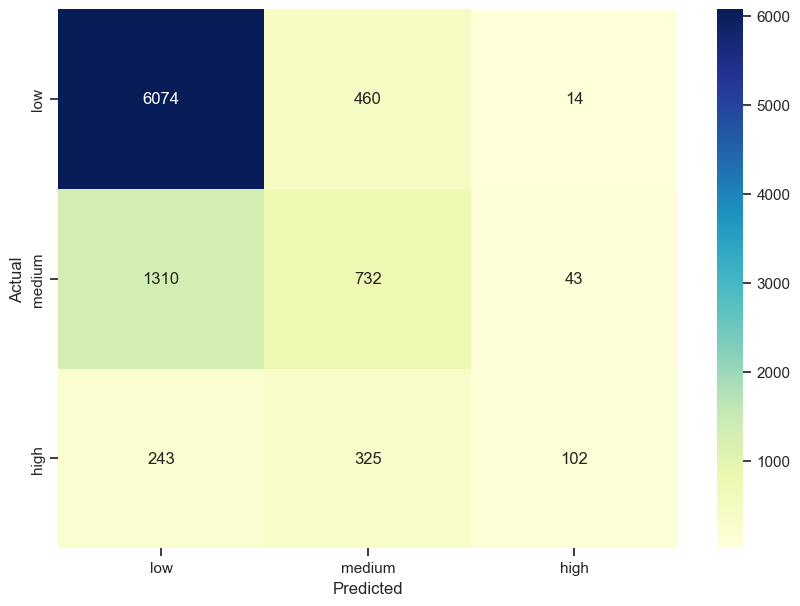

In [114]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [115]:
Logistic_Report = classification_report(y_test, y_pred, output_dict=True)
Logistic_f1 = Logistic_Report['weighted avg']['f1-score']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      6548
           1       0.48      0.35      0.41      2085
           2       0.64      0.15      0.25       670

    accuracy                           0.74      9303
   macro avg       0.64      0.48      0.50      9303
weighted avg       0.71      0.74      0.71      9303



In [116]:
y_pred_prob = logreg.predict_proba(X_test)

In [117]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = [accuracy_score(y_test, [1 if p >= thr else 0 for p in y_pred_prob[:, 1]]) for thr in thresholds]

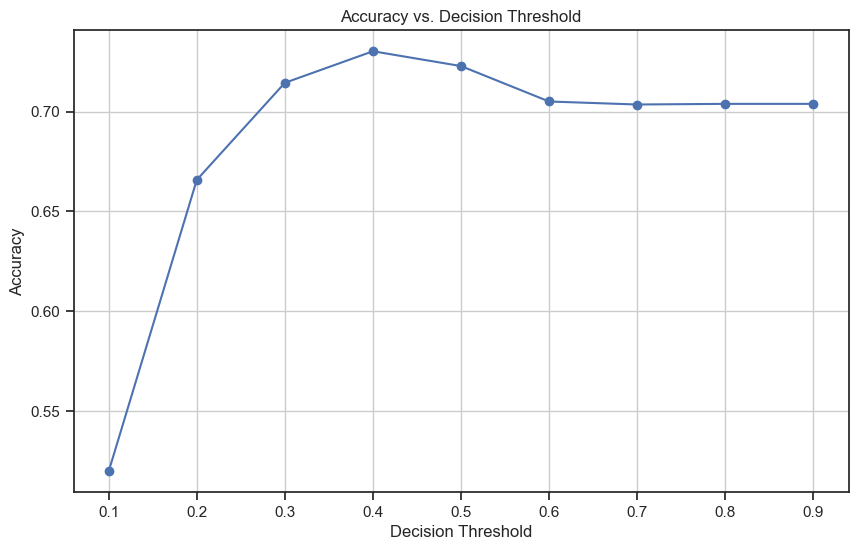

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o')
plt.title('Accuracy vs. Decision Threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

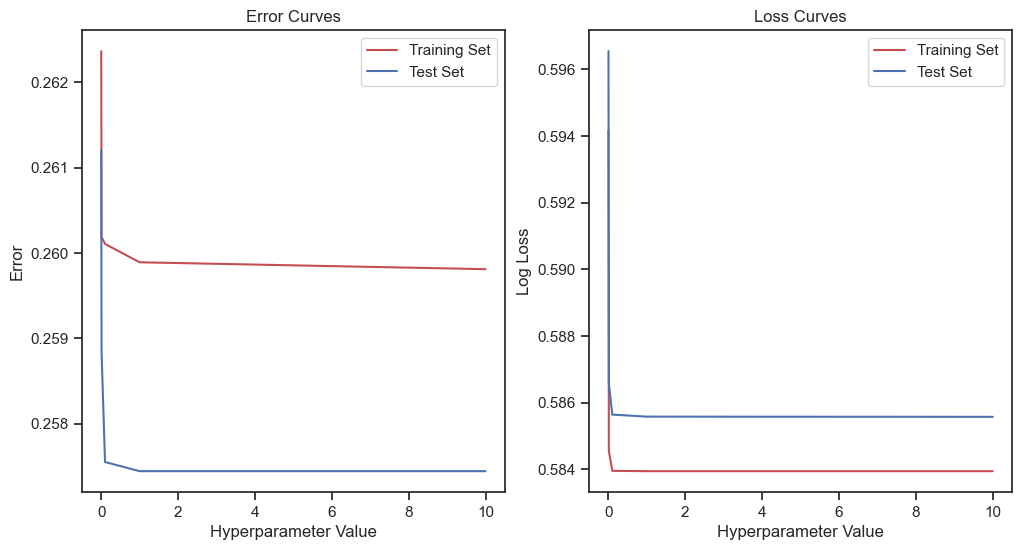

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score

# Define a function to plot error and loss curves
def plot_error_loss_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    train_losses, test_losses = [], []

    # Define a range of hyperparameters (e.g., alpha for regularization)
    hyperparameters = [0.001, 0.01, 0.1, 1, 10]

    for hyperparameter in hyperparameters:
        model.set_params(C=hyperparameter)  # Set the hyperparameter (replace with your hyperparameter)

        model.fit(X_train, y_train)  # Train the model

        # Training set predictions
        y_train_pred = model.predict(X_train)
        y_train_prob = model.predict_proba(X_train)

        # Test set predictions
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)

        # Calculate and append training and test errors
        train_errors.append(1 - accuracy_score(y_train, y_train_pred))
        test_errors.append(1 - accuracy_score(y_test, y_test_pred))

        # Calculate and append log loss
        train_losses.append(log_loss(y_train, y_train_prob))
        test_losses.append(log_loss(y_test, y_test_prob))

    # Plot error curves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hyperparameters, train_errors, "r-", label="Training Set")
    plt.plot(hyperparameters, test_errors, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Error")
    plt.title("Error Curves")
    plt.legend()

    # Plot loss curves
    plt.subplot(1, 2, 2)
    plt.plot(hyperparameters, train_losses, "r-", label="Training Set")
    plt.plot(hyperparameters, test_losses, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Log Loss")
    plt.title("Loss Curves")
    plt.legend()

    plt.show()

# Call the function to plot error and loss curves
plot_error_loss_curves(LogisticRegression(), X_train, y_train, X_test, y_test)


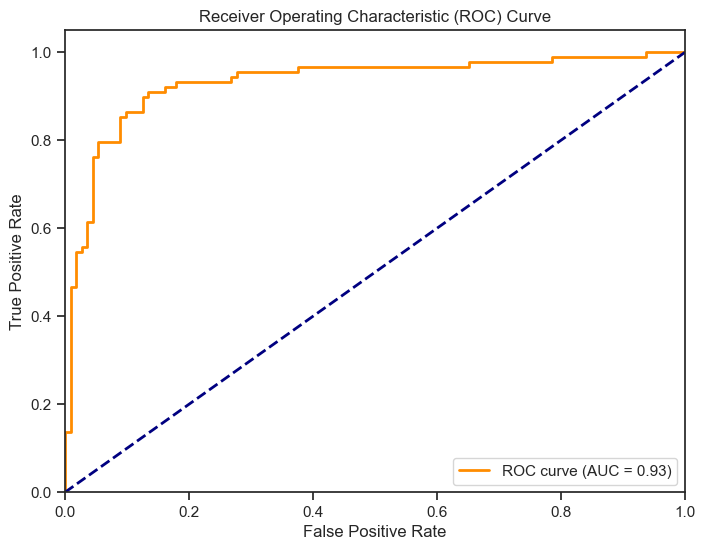

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a classifier (e.g., Logistic Regression)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNN

In [121]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [122]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
knn = KNeighborsClassifier(n_neighbors=100)

In [124]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [125]:
y_pred = knn.predict(X_test)

In [126]:
kVals = range(1, 30, 2)
accuracies = []
for k in kVals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=87.50%
k=3, accuracy=87.00%
k=5, accuracy=88.00%
k=7, accuracy=86.50%
k=9, accuracy=89.00%
k=11, accuracy=88.50%
k=13, accuracy=90.00%
k=15, accuracy=90.00%
k=17, accuracy=89.00%
k=19, accuracy=89.00%
k=21, accuracy=90.00%
k=23, accuracy=88.50%
k=25, accuracy=89.50%
k=27, accuracy=90.00%
k=29, accuracy=89.50%


In [127]:
from sklearn.preprocessing import label_binarize

# Assuming y_pred contains predictions for two classes
n_classes = 3  # The number of classes in your true labels

# Reformat y_pred to match the number of classes in y_train
y_pred_reformatted = label_binarize(y_pred, classes=range(n_classes))

# Now, you can calculate log-loss
logloss = log_loss(y_train[:100], y_pred_reformatted[:100], labels=range(n_classes))
print(logloss)

18.382263228449748


In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 30, 2)}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Re-train the model with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [129]:
kVals = range(1, 30, 2)
error_rates = []
log_losses = []

for k in kVals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Ensure y_pred has the same number of classes as y_test
    classes = np.unique(y_test)
    y_pred = label_binarize(y_pred, classes=classes)
    
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)
    
    log_loss_value = log_loss(y_test, y_pred)
    log_losses.append(log_loss_value)

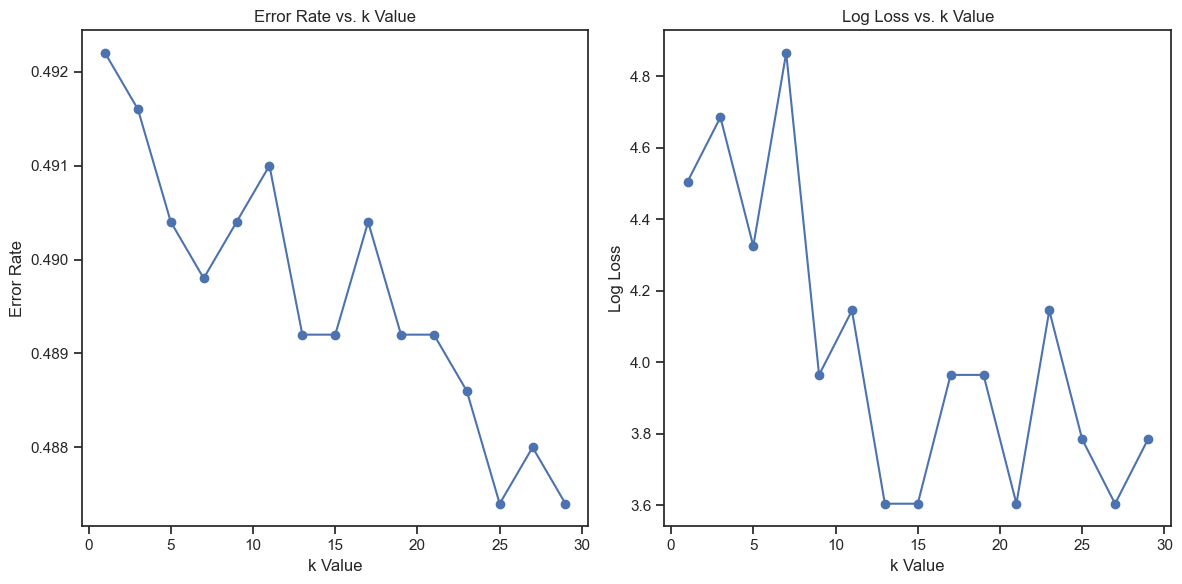

In [130]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(kVals, error_rates, marker='o', linestyle='-')
plt.title("Error Rate vs. k Value")
plt.xlabel("k Value")
plt.ylabel("Error Rate")

plt.subplot(1, 2, 2)
plt.plot(kVals, log_losses, marker='o', linestyle='-')
plt.title("Log Loss vs. k Value")
plt.xlabel("k Value")
plt.ylabel("Log Loss")

plt.tight_layout()
plt.show()

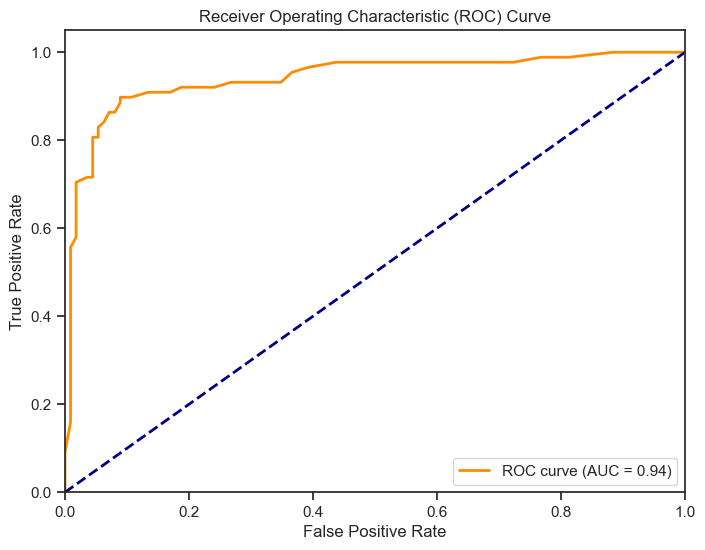

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a classifier (e.g., Logistic Regression)
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## log-loss

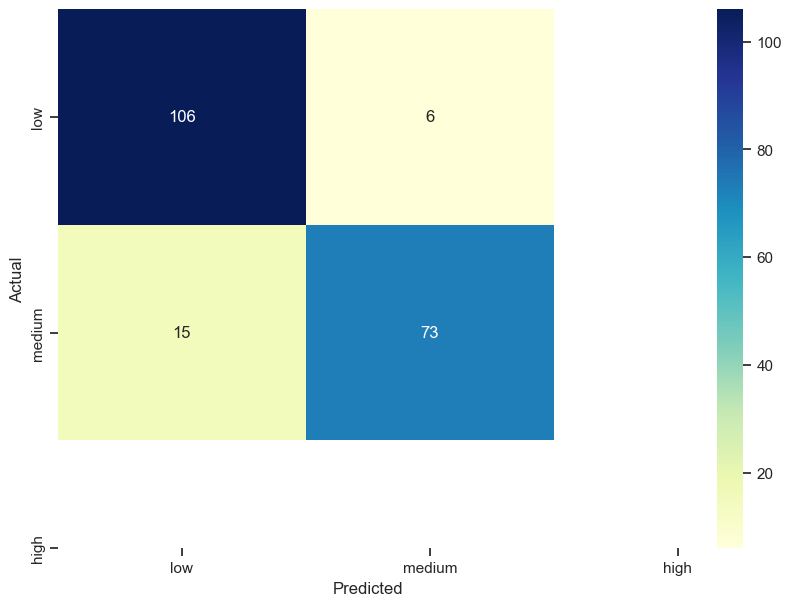

In [132]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [133]:
KNN_Report = classification_report(y_test, y_pred, output_dict=True)
KNN_f1 = KNN_Report['weighted avg']['f1-score']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       112
           1       0.92      0.83      0.87        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



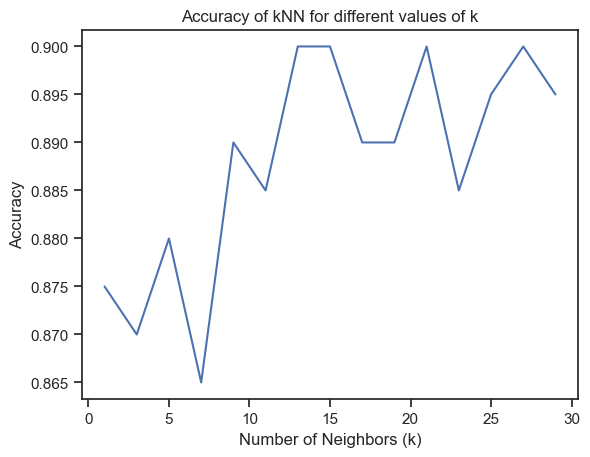

In [134]:
fig, ax = plt.subplots()
ax.plot(kVals, accuracies)
ax.set_xlabel('Number of Neighbors (k)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of kNN for different values of k')
plt.show()

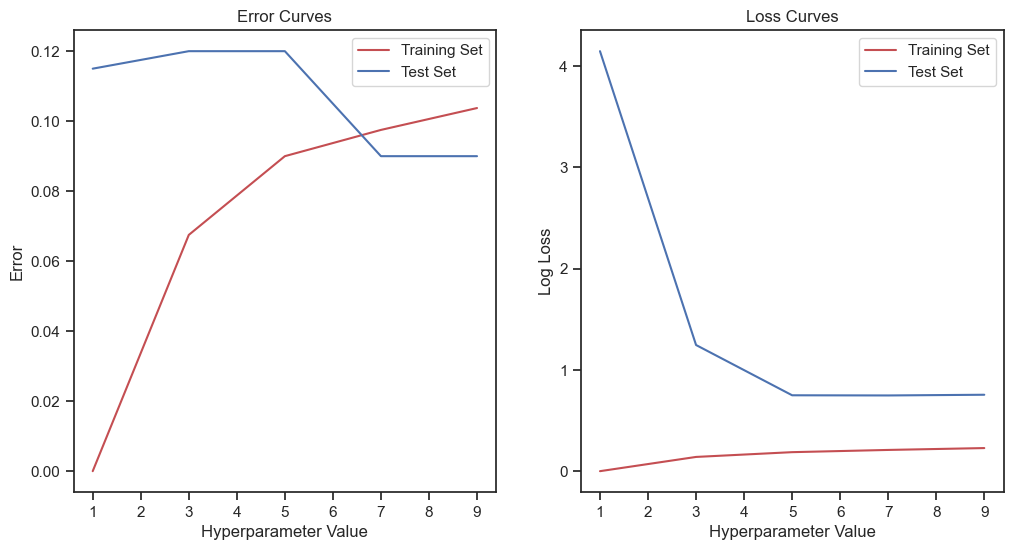

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Define a function to plot error and loss curves
def plot_error_loss_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    train_losses, test_losses = [], []

    # Define a range of hyperparameters (e.g., number of neighbors for KNN)
    hyperparameters = [1, 3, 5, 7, 9]

    for hyperparameter in hyperparameters:
        model.set_params(n_neighbors=hyperparameter)  # Set the hyperparameter (replace with your hyperparameter)

        model.fit(X_train, y_train)  # Train the model

        # Training set predictions
        y_train_pred = model.predict(X_train)
        y_train_prob = model.predict_proba(X_train)

        # Test set predictions
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)

        # Calculate and append training and test errors
        train_errors.append(1 - accuracy_score(y_train, y_train_pred))
        test_errors.append(1 - accuracy_score(y_test, y_test_pred))

        # Calculate and append log loss
        train_losses.append(log_loss(y_train, y_train_prob))
        test_losses.append(log_loss(y_test, y_test_prob))

    # Plot error curves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hyperparameters, train_errors, "r-", label="Training Set")
    plt.plot(hyperparameters, test_errors, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Error")
    plt.title("Error Curves")
    plt.legend()

    # Plot loss curves
    plt.subplot(1, 2, 2)
    plt.plot(hyperparameters, train_losses, "r-", label="Training Set")
    plt.plot(hyperparameters, test_losses, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Log Loss")
    plt.title("Loss Curves")
    plt.legend()

    plt.show()

# Call the function to plot error and loss curves
plot_error_loss_curves(KNeighborsClassifier(), X_train, y_train, X_test, y_test)


# Random Forest

In [135]:
rfc = RandomForestClassifier(n_estimators=1)

In [136]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1)

In [137]:
y_pred = rfc.predict(X_test)

In [138]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [139]:
print(confusion_matrix(y_test, y_pred))

[[98 14]
 [11 77]]


In [140]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [141]:
Forest_Report = classification_report(y_test, y_pred, output_dict=True)
Forest_f1 = Forest_Report['weighted avg']['f1-score']

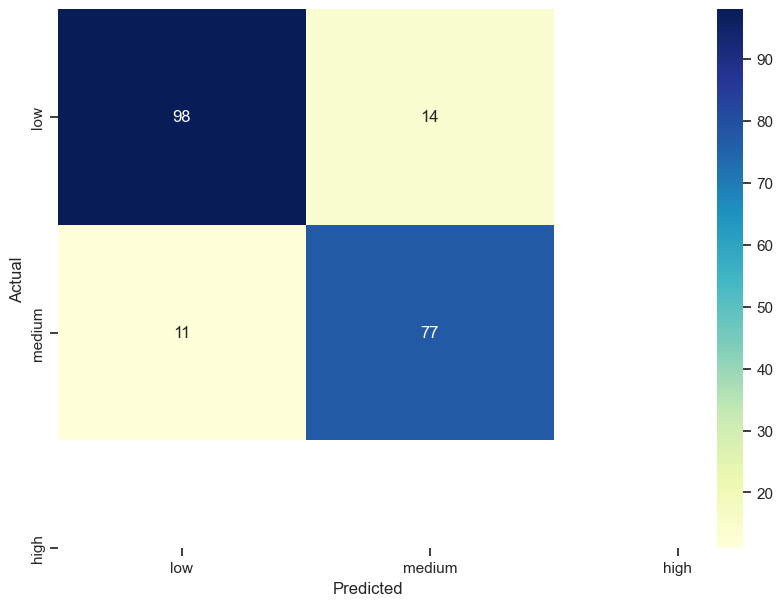

In [142]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       112
           1       0.85      0.88      0.86        88

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



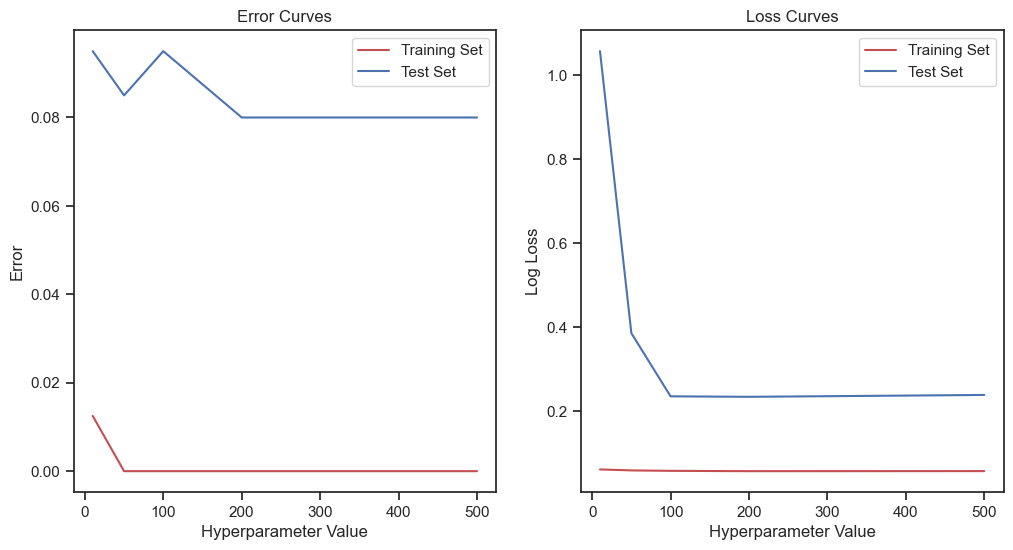

In [158]:
from sklearn.ensemble import RandomForestClassifier

# Define a function to plot error and loss curves
def plot_error_loss_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    train_losses, test_losses = [], []

    # Define a range of hyperparameters (e.g., number of estimators for Random Forest)
    hyperparameters = [10, 50, 100, 200, 500]

    for hyperparameter in hyperparameters:
        model.set_params(n_estimators=hyperparameter)  # Set the hyperparameter

        model.fit(X_train, y_train)  # Train the model

        # Training set predictions
        y_train_pred = model.predict(X_train)
        y_train_prob = model.predict_proba(X_train)

        # Test set predictions
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)

        # Calculate and append training and test errors
        train_errors.append(1 - accuracy_score(y_train, y_train_pred))
        test_errors.append(1 - accuracy_score(y_test, y_test_pred))

        # Calculate and append log loss
        train_losses.append(log_loss(y_train, y_train_prob))
        test_losses.append(log_loss(y_test, y_test_prob))

    # Plot error curves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hyperparameters, train_errors, "r-", label="Training Set")
    plt.plot(hyperparameters, test_errors, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Error")
    plt.title("Error Curves")
    plt.legend()

    # Plot loss curves
    plt.subplot(1, 2, 2)
    plt.plot(hyperparameters, train_losses, "r-", label="Training Set")
    plt.plot(hyperparameters, test_losses, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Log Loss")
    plt.title("Loss Curves")
    plt.legend()

    plt.show()

# Call the function to plot error and loss curves
plot_error_loss_curves(RandomForestClassifier(), X_train, y_train, X_test, y_test)


# SVC MODEL

In [144]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [145]:
y_pred = svc.predict(X_test)

In [146]:
cm = confusion_matrix(y_test, y_pred)

Text(92.25, 0.5, 'Truth')

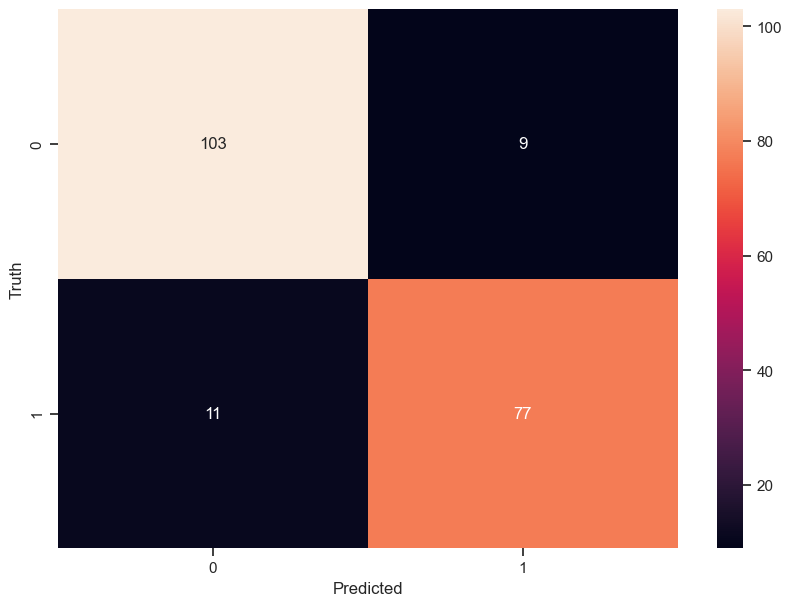

In [147]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [148]:
SVC_Report = classification_report(y_test, y_pred, output_dict=True)
SVC_f1 = SVC_Report['weighted avg']['f1-score']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       112
           1       0.90      0.88      0.89        88

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



MODEL COMPARISION

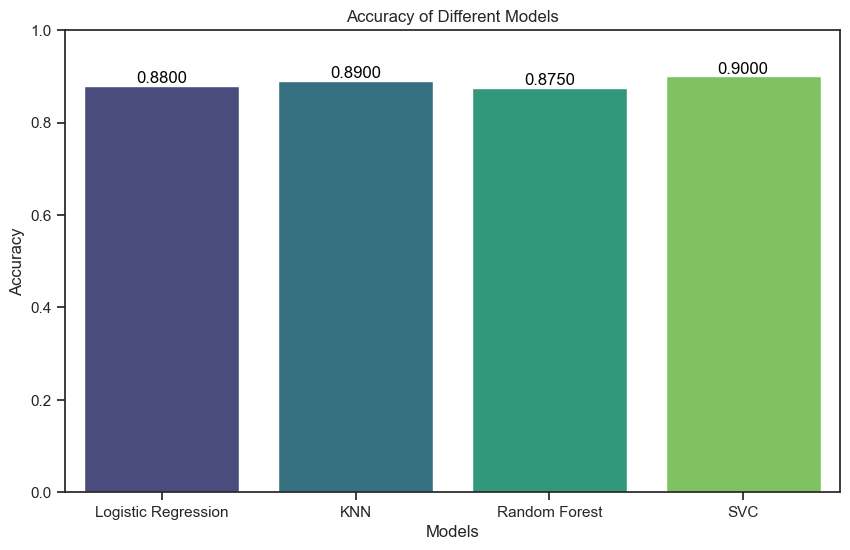

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy of each model
logreg_accuracy = logreg.score(X_test, y_test)
knn_accuracy = knn.score(X_test, y_test)
rfc_accuracy = rfc.score(X_test, y_test)
svc_accuracy = svc.score(X_test, y_test)

# Create a list of accuracies
accuracies = [logreg_accuracy, knn_accuracy, rfc_accuracy, svc_accuracy]

# Create a list of model names
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.4f}', ha='center', va='bottom', fontsize=12, color='black')

# Set the y-axis limit to be between 0 and 1
plt.ylim(0, 1)
plt.show()


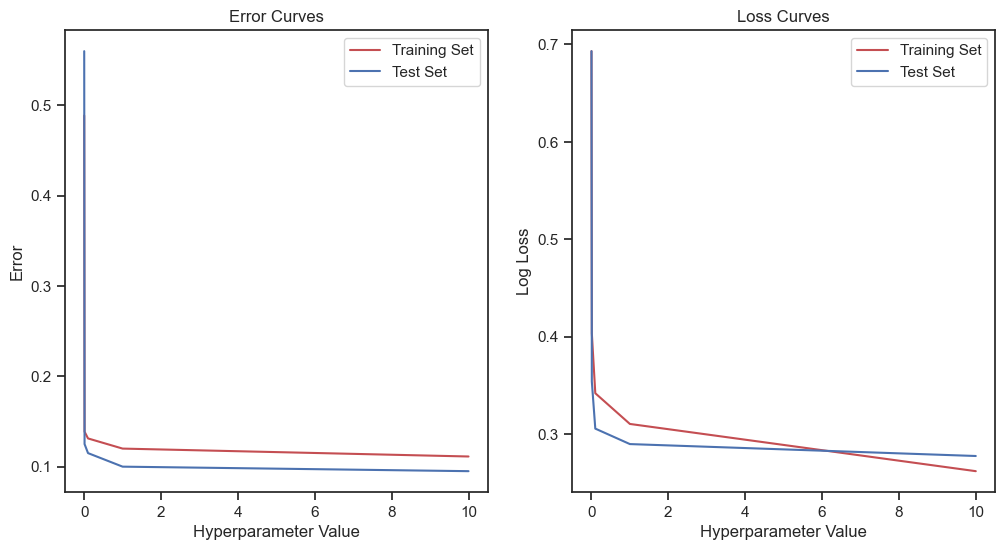

In [157]:
from sklearn.svm import SVC

# Define a function to plot error and loss curves
def plot_error_loss_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    train_losses, test_losses = [], []

    # Define a range of hyperparameters (e.g., C for SVC)
    hyperparameters = [0.001, 0.01, 0.1, 1, 10]

    for hyperparameter in hyperparameters:
        model.set_params(C=hyperparameter)  # Set the hyperparameter

        model.fit(X_train, y_train)  # Train the model

        # Training set predictions
        y_train_pred = model.predict(X_train)
        y_train_prob = model.predict_proba(X_train)

        # Test set predictions
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)

        # Calculate and append training and test errors
        train_errors.append(1 - accuracy_score(y_train, y_train_pred))
        test_errors.append(1 - accuracy_score(y_test, y_test_pred))

        # Calculate and append log loss
        train_losses.append(log_loss(y_train, y_train_prob))
        test_losses.append(log_loss(y_test, y_test_prob))

    # Plot error curves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hyperparameters, train_errors, "r-", label="Training Set")
    plt.plot(hyperparameters, test_errors, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Error")
    plt.title("Error Curves")
    plt.legend()

    # Plot loss curves
    plt.subplot(1, 2, 2)
    plt.plot(hyperparameters, train_losses, "r-", label="Training Set")
    plt.plot(hyperparameters, test_losses, "b-", label="Test Set")
    plt.xlabel("Hyperparameter Value")
    plt.ylabel("Log Loss")
    plt.title("Loss Curves")
    plt.legend()

    plt.show()

# Call the function to plot error and loss curves
plot_error_loss_curves(SVC(probability=True), X_train, y_train, X_test, y_test)
